# Introduction
Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis.

# About the dataset
Here, we have daily data for 2 years.The target variable is the total count of bikes rented during each day.The independent variables are various factors like humidity, temperature, windspeed, weathersituation,season

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("day.csv")

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
df=df.drop("instant",axis=1)

In [5]:
df.shape

(731, 15)

# Visualizing Time Series Trends

In [7]:
#we are converting the column to datetime format
df["dteday"]=pd.to_datetime(df.dteday)

In [8]:
df1=df.copy()

In [9]:
df1.index=df1.dteday

<AxesSubplot:xlabel='dteday'>

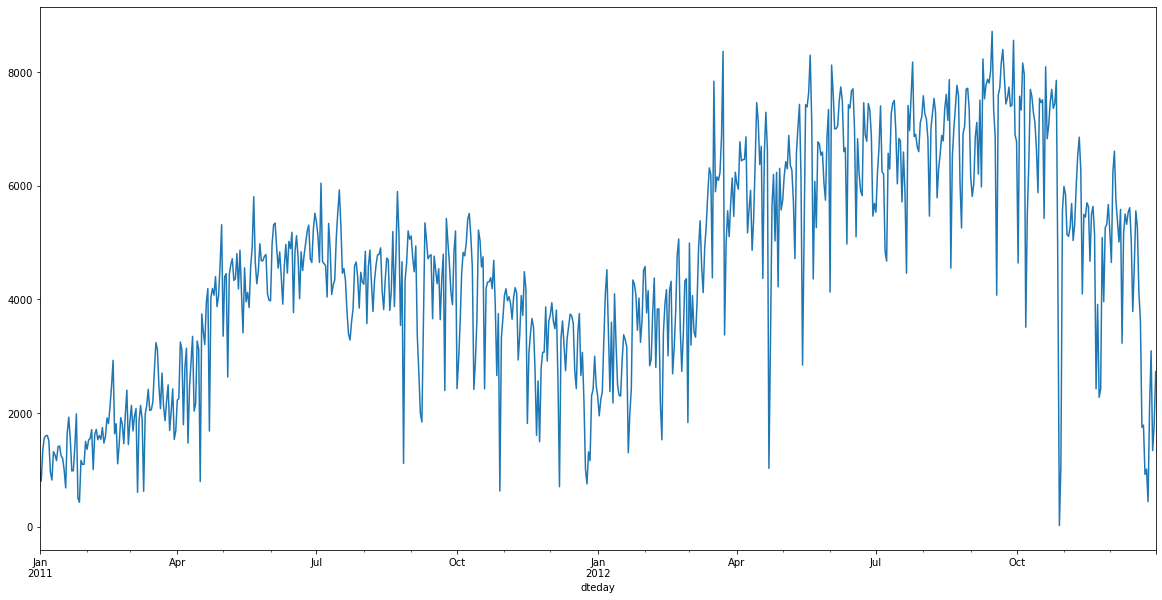

In [10]:
df1.cnt.plot()

<AxesSubplot:xlabel='dteday'>

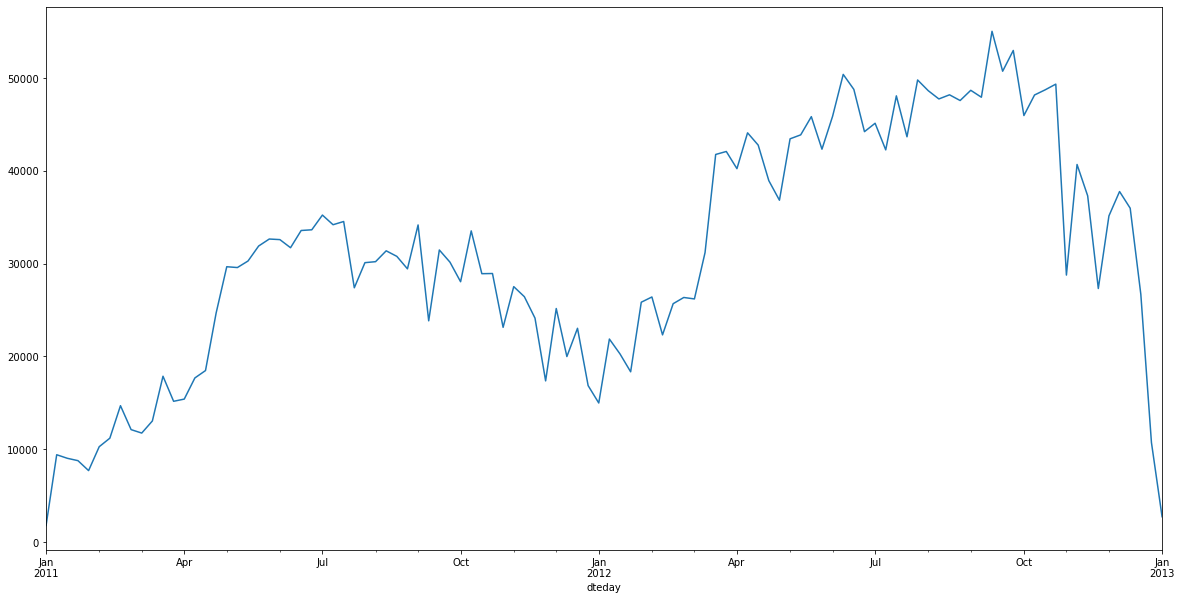

In [11]:
#resampling by weeks and plotting the sum
df1.cnt.resample("W").sum().plot()

<AxesSubplot:xlabel='dteday'>

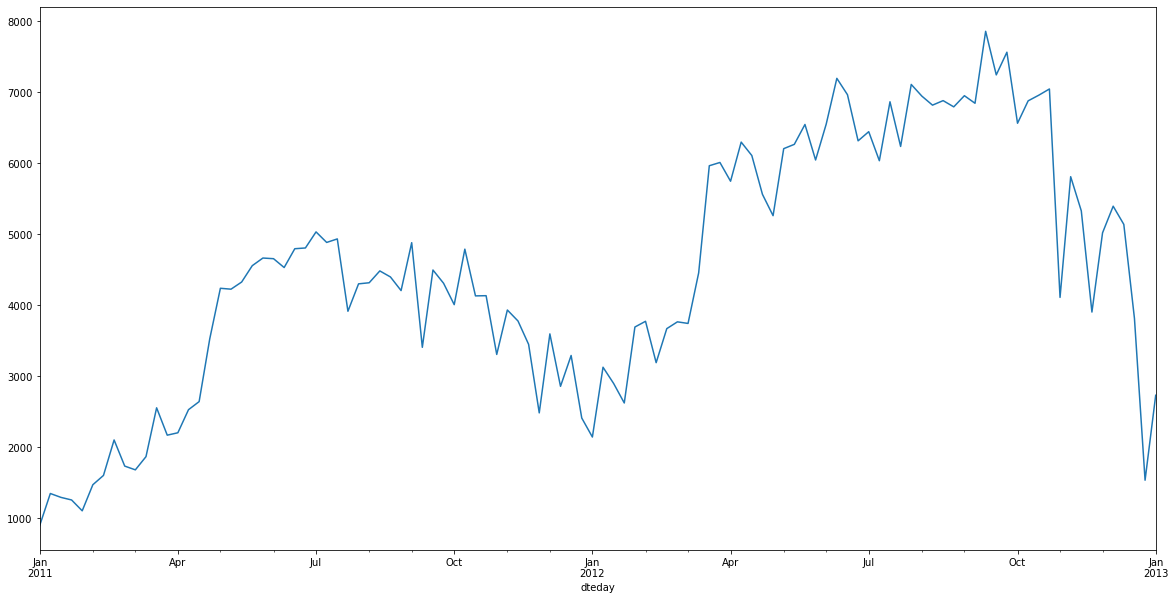

In [12]:
df1.cnt.resample("W").mean().plot()

<AxesSubplot:xlabel='dteday'>

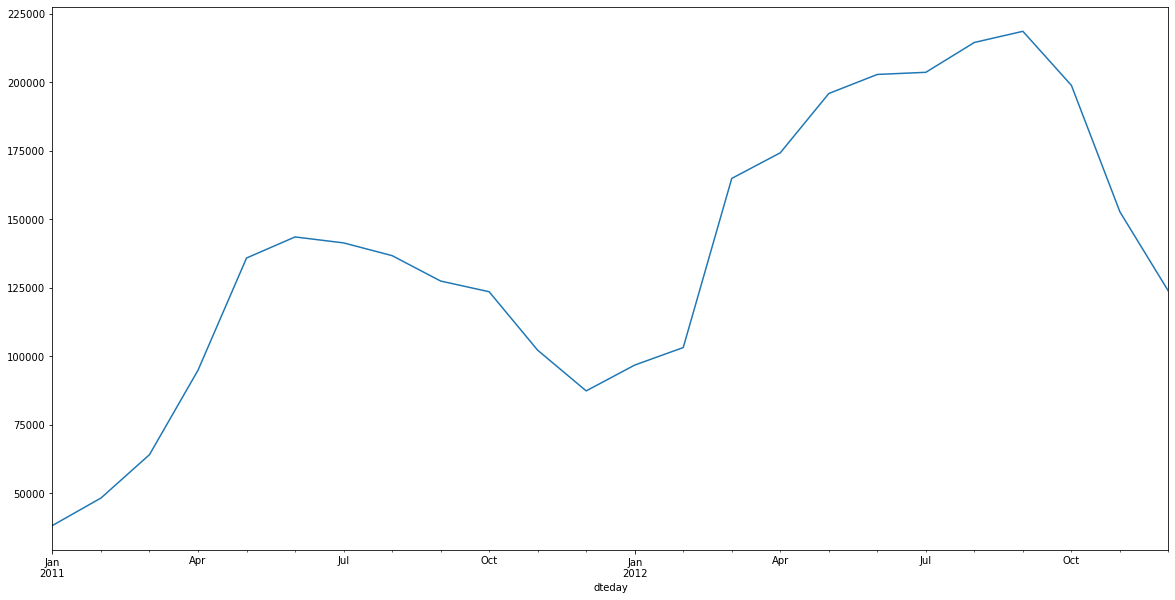

In [13]:
df1.cnt.resample("M").sum().plot()

<AxesSubplot:xlabel='dteday'>

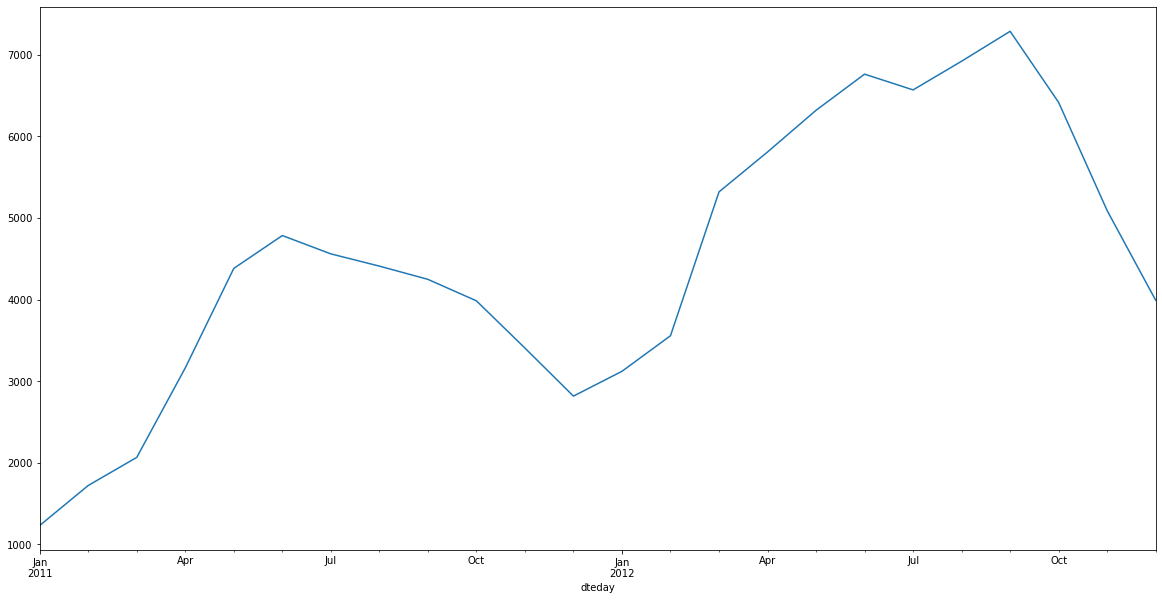

In [14]:
df1.cnt.resample("M").mean().plot()

<AxesSubplot:xlabel='dteday'>

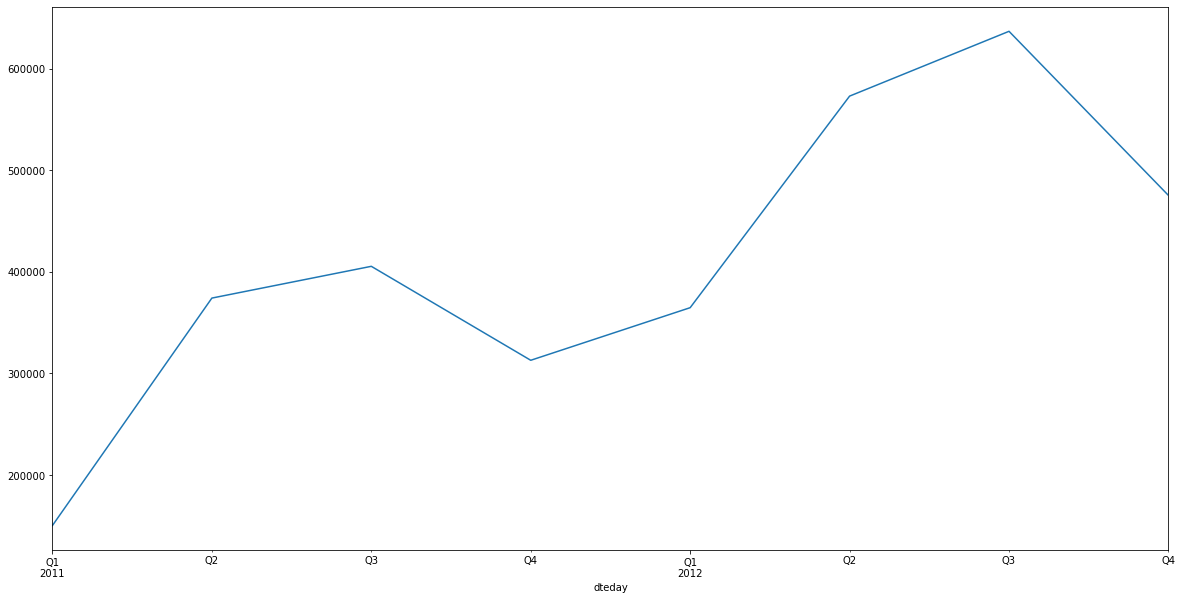

In [15]:
df1.cnt.resample("Q").sum().plot()

<AxesSubplot:xlabel='dteday'>

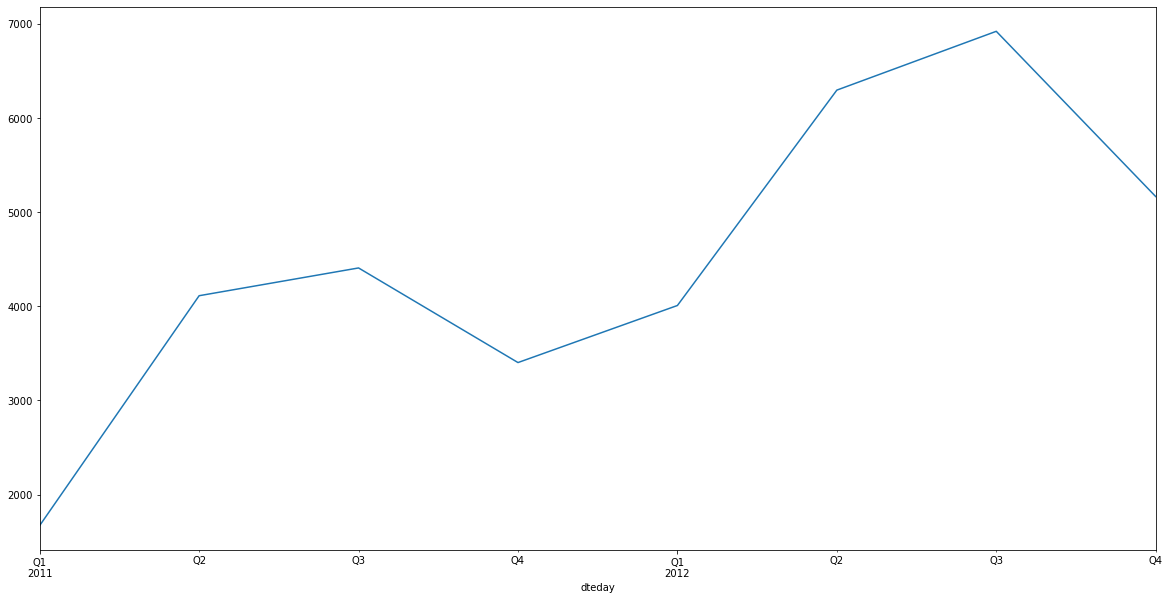

In [16]:
df1.cnt.resample("Q").mean().plot()

We see a seasonal trend here 
Q1-Q2-Sharp increase
Q2-Q3-Moderate increase
Q3-Q4-sharp decrease
Q4-Q1-increase

# EDA

In [17]:
# getting names of days
df1["dayname"]=df1.dteday.dt.strftime('%A')

<AxesSubplot:ylabel='Frequency'>

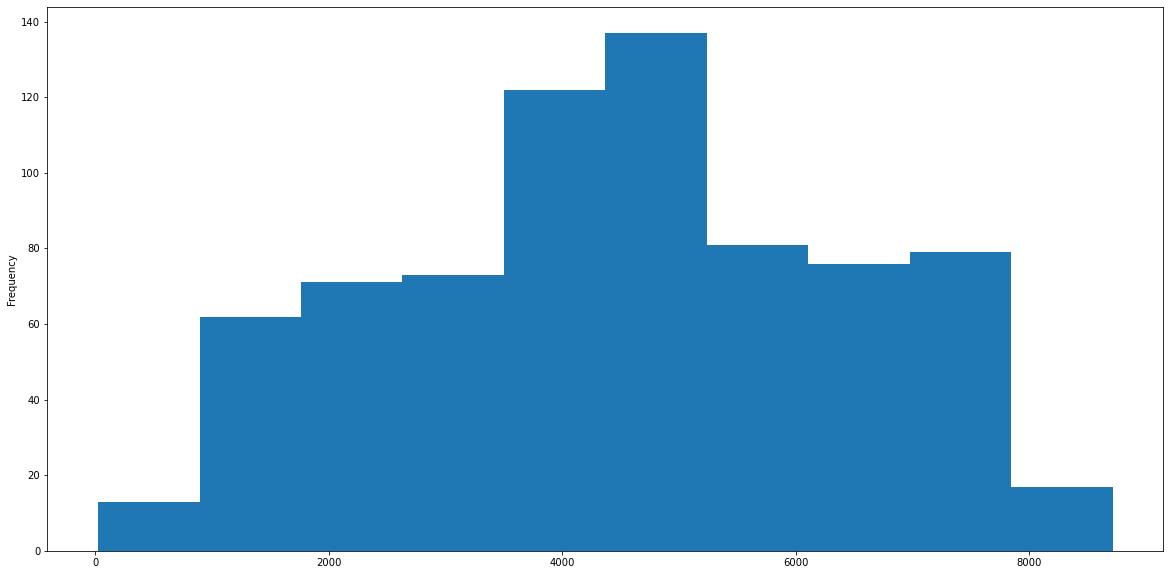

In [18]:
df1.cnt.plot.hist()

In [19]:
df1.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'dayname'],
      dtype='object')

In [20]:
#function to the Quarter of the year
def quarter(month):
    if month in [1,2,3]:
        return "Q1"
    elif month in [4,5,6]:
        return "Q2"
    elif month in [7,8,9]:
        return "Q3"
    else:
        return "Q4"

In [21]:
df1["Quarter"]=df1.mnth.apply(quarter)

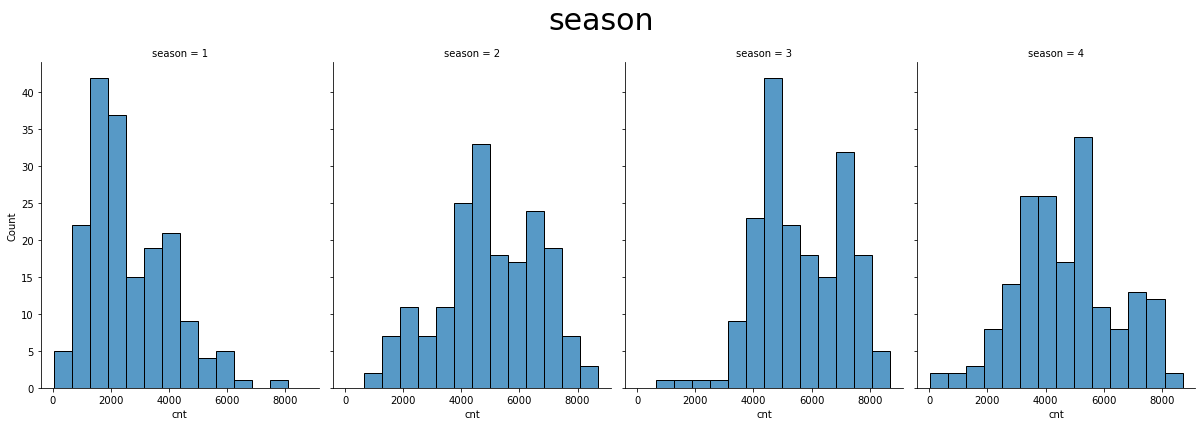

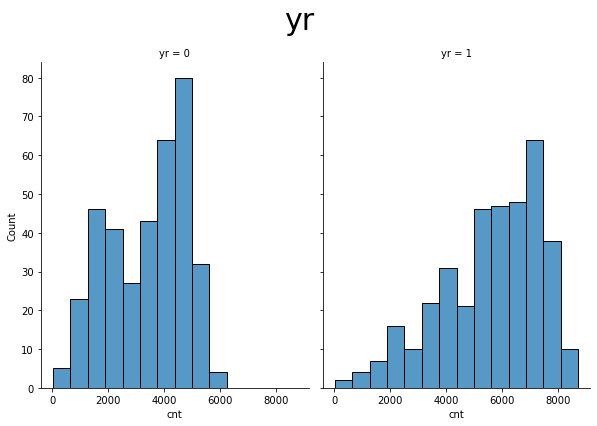

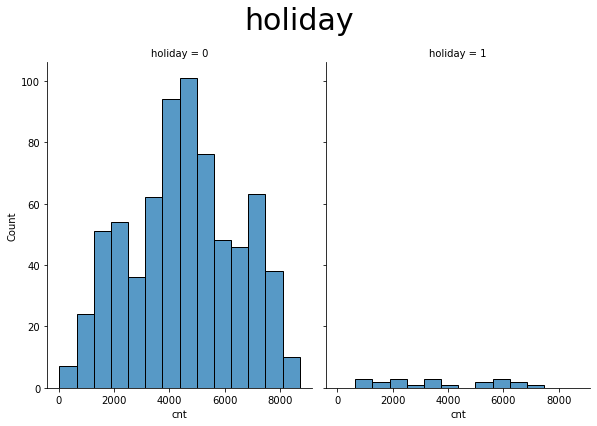

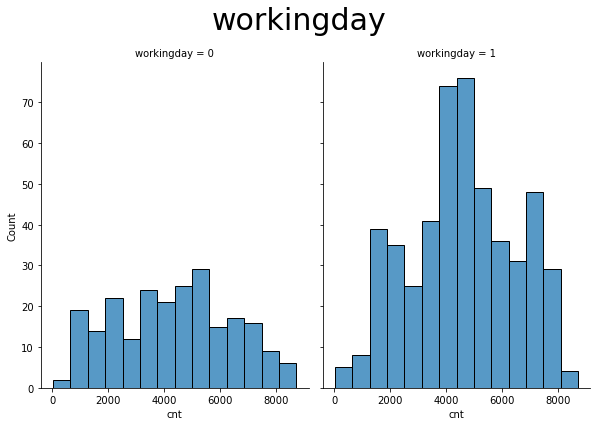

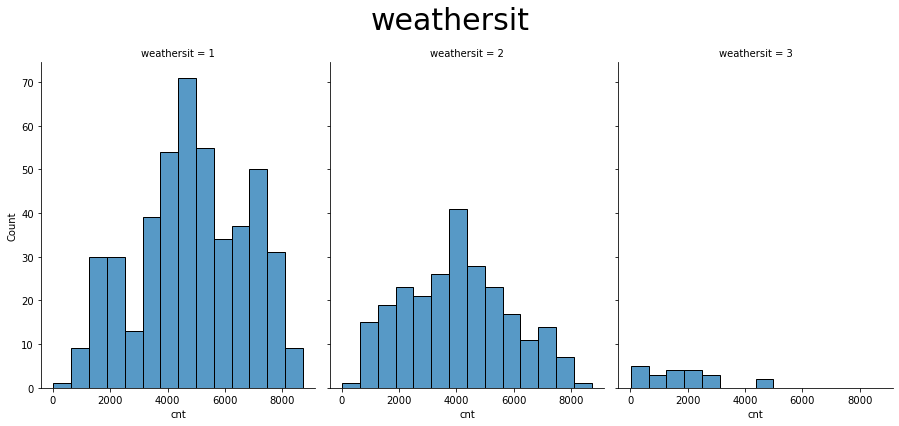

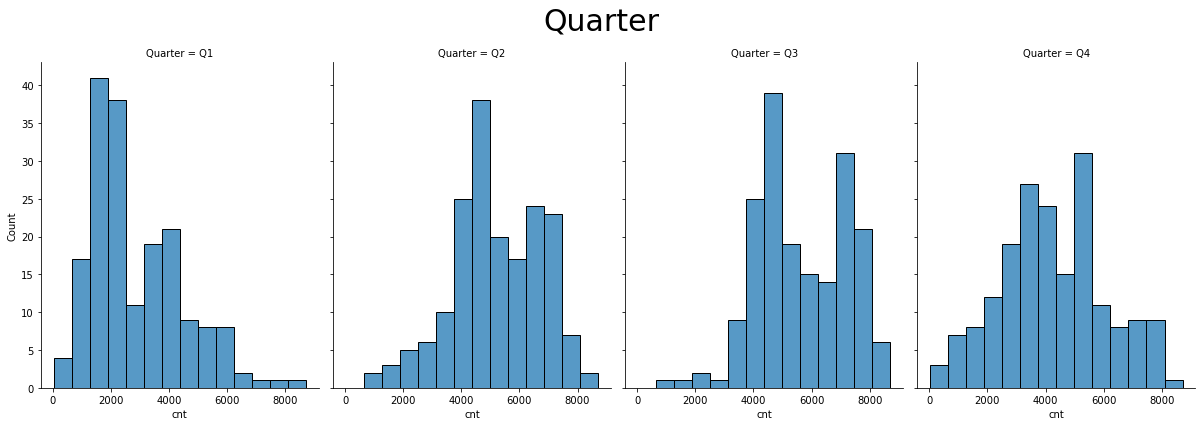

In [22]:
#Here we are plotting the distribution of cnt based on the various categories of the categorical variables
for i in ['season', 'yr', 'holiday','workingday', 'weathersit',"Quarter"]:
    
    rel=sns.displot(x="cnt",data=df1,col=i,height=6, aspect=.7)
    rel.fig.suptitle(i,fontsize=50,size=30)
    plt.tight_layout()

In [23]:
df1.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'dayname', 'Quarter'],
      dtype='object')

In [24]:
cont=['temp', 'atemp', 'hum', 'windspeed', 'casual','registered', 'cnt']

<AxesSubplot:>

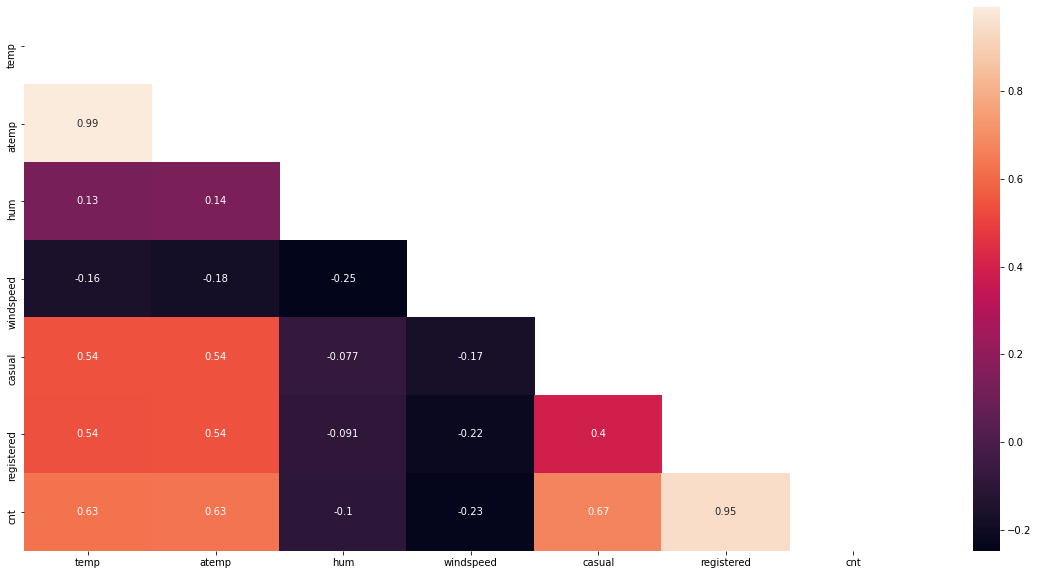

In [25]:
#plotting the correlation matrix
corr=df1[cont].corr()
mask=np.triu(np.ones_like(corr,dtype=bool))
sns.heatmap(corr,mask=mask,annot=True)

Temp and atemp shows high positive correlation coefficient

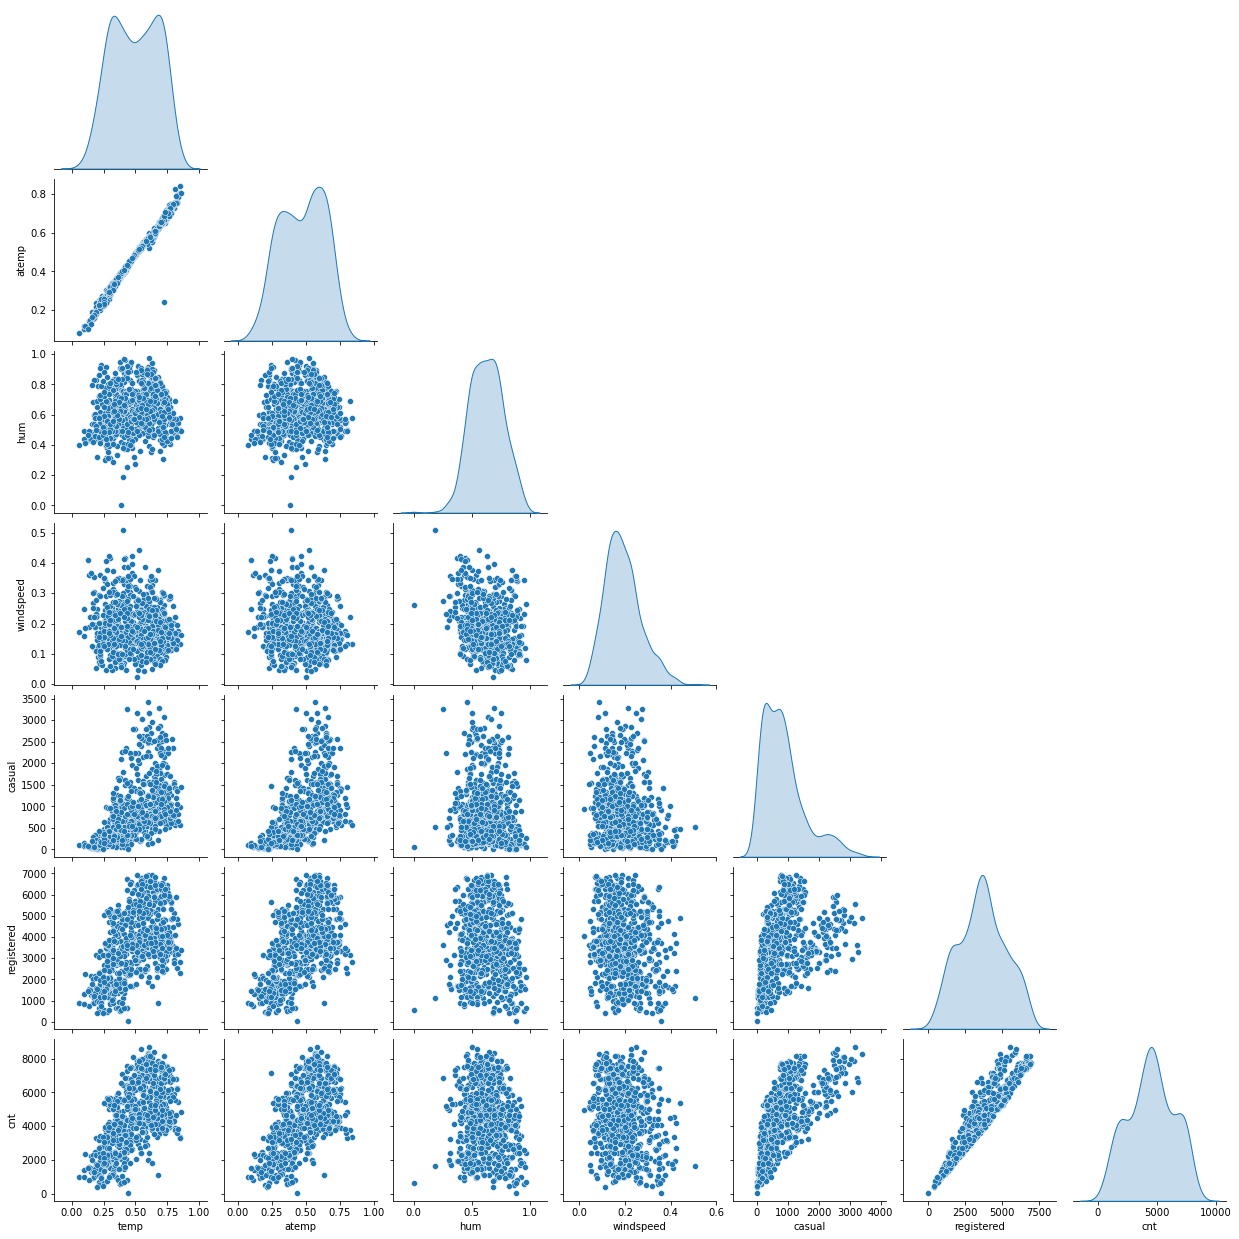

In [26]:
sns.pairplot(df1[cont],corner=True,diag_kind="kde")

In [27]:
#creating a new feature
df2=df1.copy()
def daytype(l):
    a=l[0]
    b=l[1]
    if (a==0) & (b==0):
        return "Weekend"
    elif (a==1) & (b==0):
        return "WeekDay_Holiday"
    elif (a==0) & (b==1):
        return "Normal_WorkingDay"

We are creating a new columns based on conditions of holiday and workingday. In this dataset weekends have not been classified as holiday. Only holidays in weekdays have been classified as holidays.If holiday is 0 and working day is 0, it is a weekend.If holiday is 1 and working day is 0,it is a weekday_holiday. If holiday is 0 and workingday is 1, it is a normal working day.

In [29]:
d=pd.Series(df2[['holiday','workingday']].values.tolist(),index=df2.index).apply(daytype)

In [30]:
df2["daytype"]=d

In [31]:
df2.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,dayname,Quarter,daytype
dteday,,,,,,,,,,,,,,,,,,
2011-01-01,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Saturday,Q1,Weekend
2011-01-02,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Sunday,Q1,Weekend
2011-01-03,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Monday,Q1,Normal_WorkingDay
2011-01-04,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Tuesday,Q1,Normal_WorkingDay
2011-01-05,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Wednesday,Q1,Normal_WorkingDay


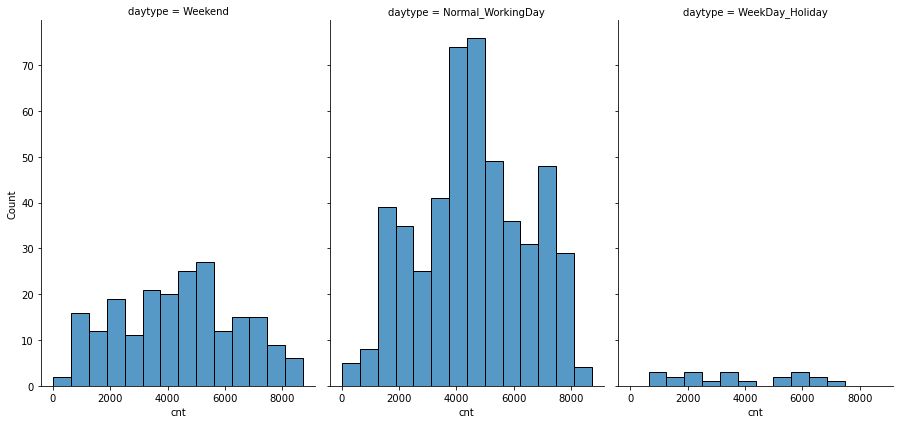

In [32]:
sns.displot(x="cnt",data=df2,col="daytype",height=6, aspect=.7)

In [33]:
df3=df2.drop("dteday",axis=1)

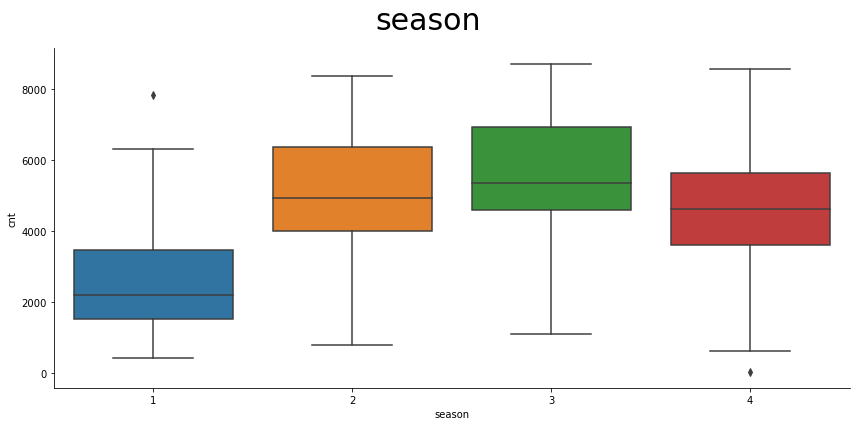

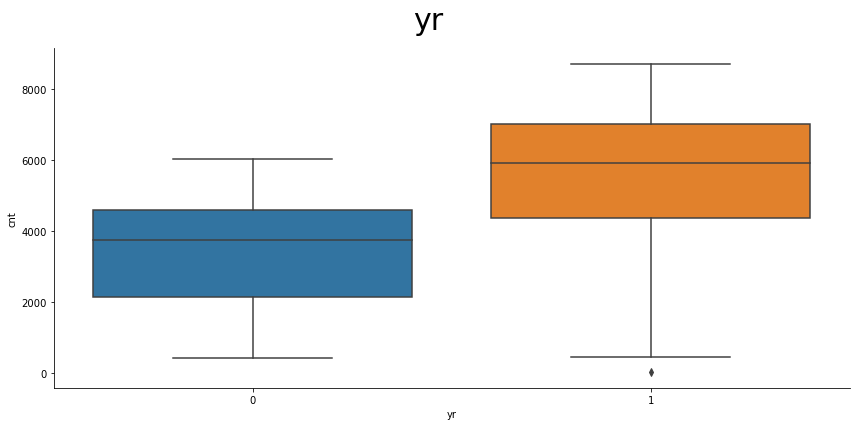

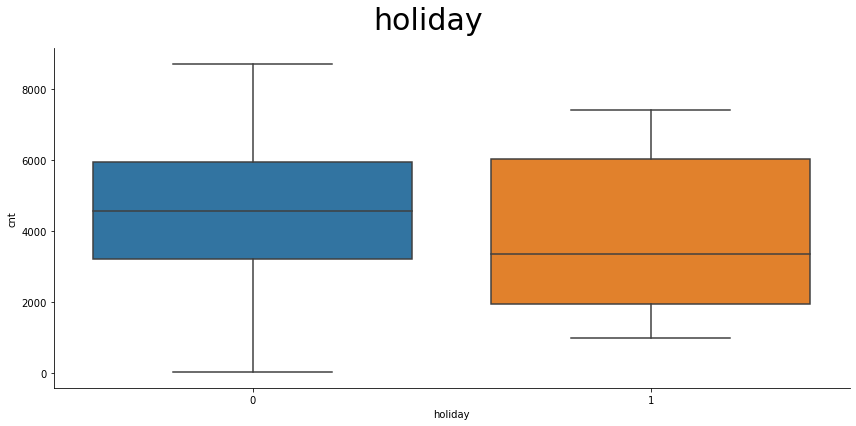

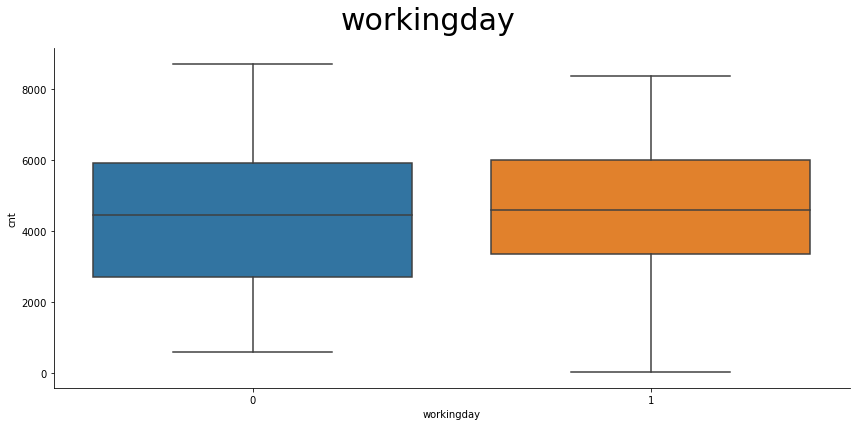

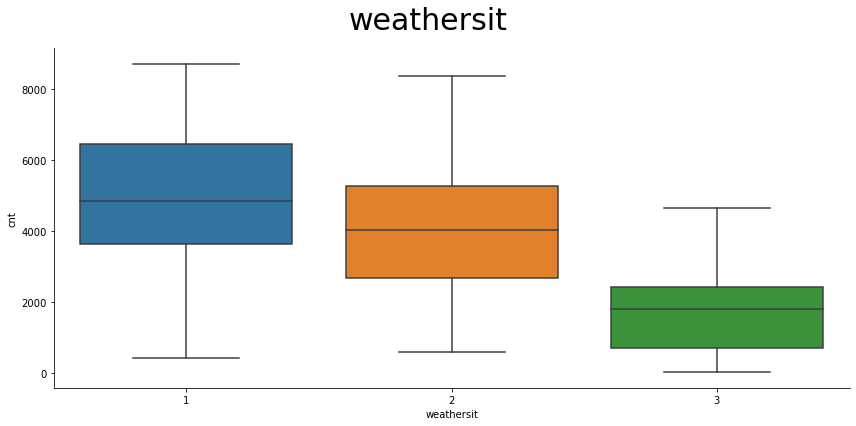

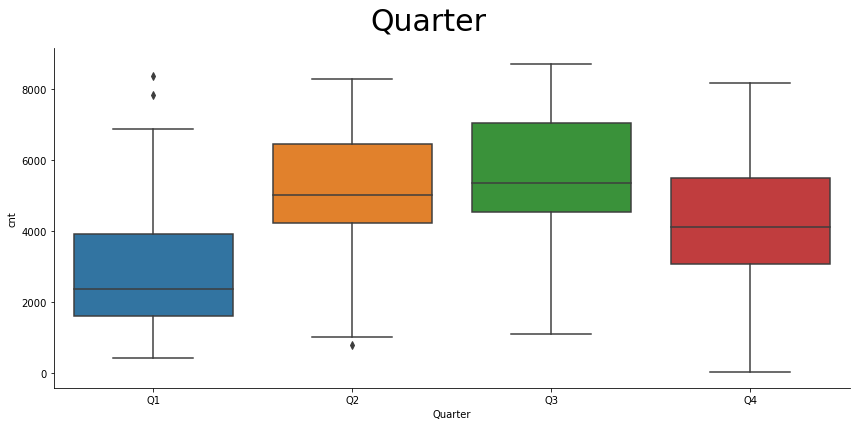

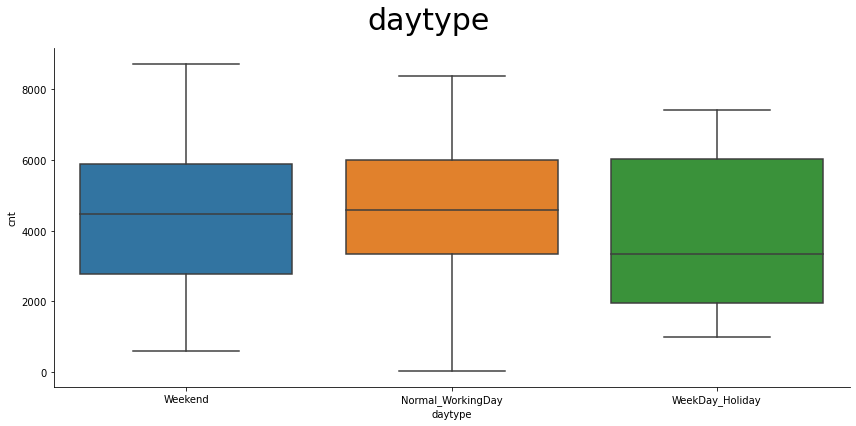

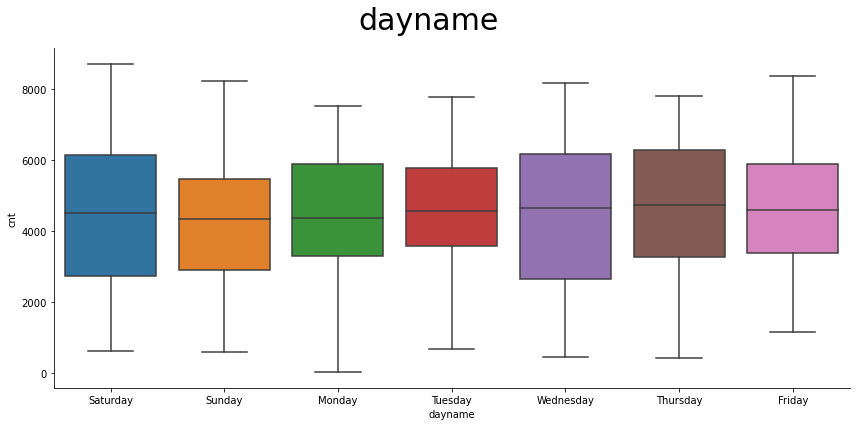

In [34]:
#Here we are plotting the boxplots for the distributions of cnt based on various categories of the categorical variables
for i in ['season', 'yr', 'holiday','workingday', 'weathersit',"Quarter","daytype","dayname"]:
    
    rel=sns.catplot(x=i,data=df3,y="cnt",height=6, aspect=2,kind="box")
    rel.fig.suptitle(i,fontsize=50,size=30)
    plt.tight_layout()

In [35]:
df3.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,dayname,Quarter,daytype
dteday,,,,,,,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Saturday,Q1,Weekend
2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Sunday,Q1,Weekend
2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Monday,Q1,Normal_WorkingDay
2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Tuesday,Q1,Normal_WorkingDay
2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Wednesday,Q1,Normal_WorkingDay


In [36]:
#creating another feature named weekend
def weekend(day):
    if(day in ["Saturday","Sunday"]):
        return 1
    else:
        return 0

df3["weekend"]=df3.dayname.apply(weekend)

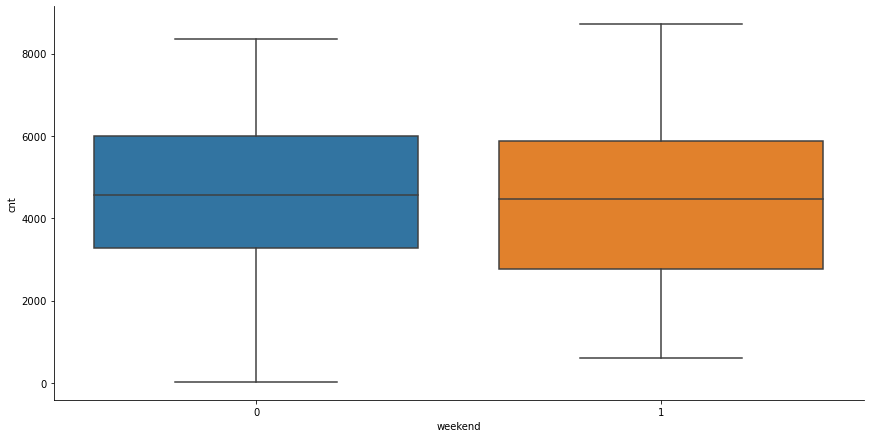

In [37]:
sns.catplot(x="weekend",data=df3,y="cnt",height=6,aspect=2,kind="box")

In [38]:
cat=['season', 'yr', 'holiday','workingday', 'weathersit',"Quarter","daytype","dayname","weekend"]

<AxesSubplot:xlabel='daytype', ylabel='cnt'>

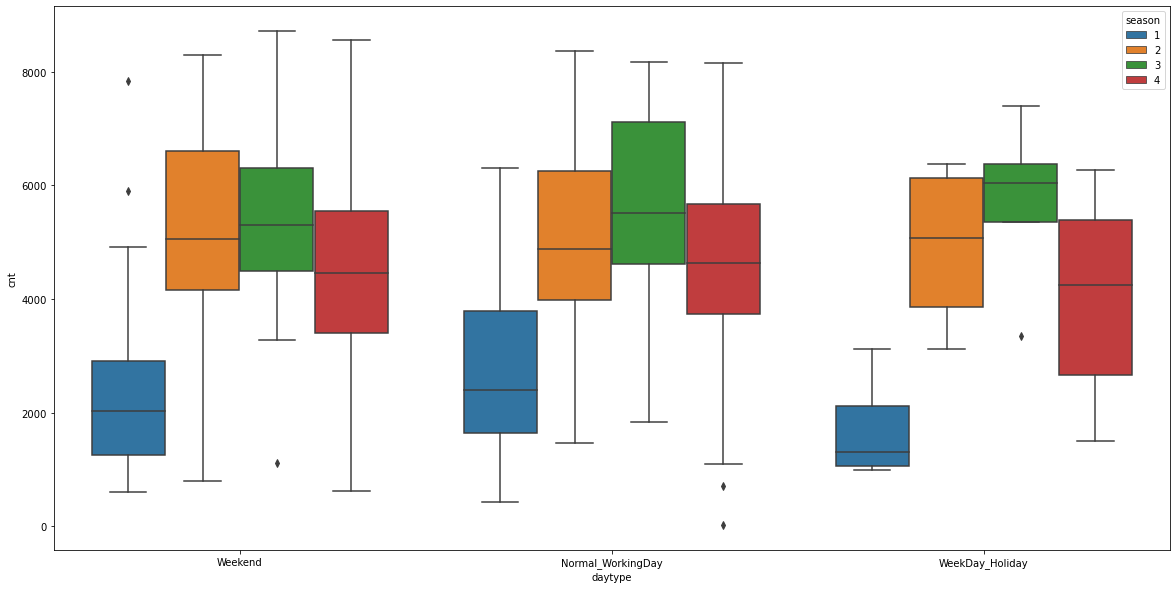

In [39]:
#Seeing the number of bikes based on the daytype and season
sns.boxplot(x="daytype",y="cnt",data=df3,hue="season")

<AxesSubplot:xlabel='daytype', ylabel='cnt'>

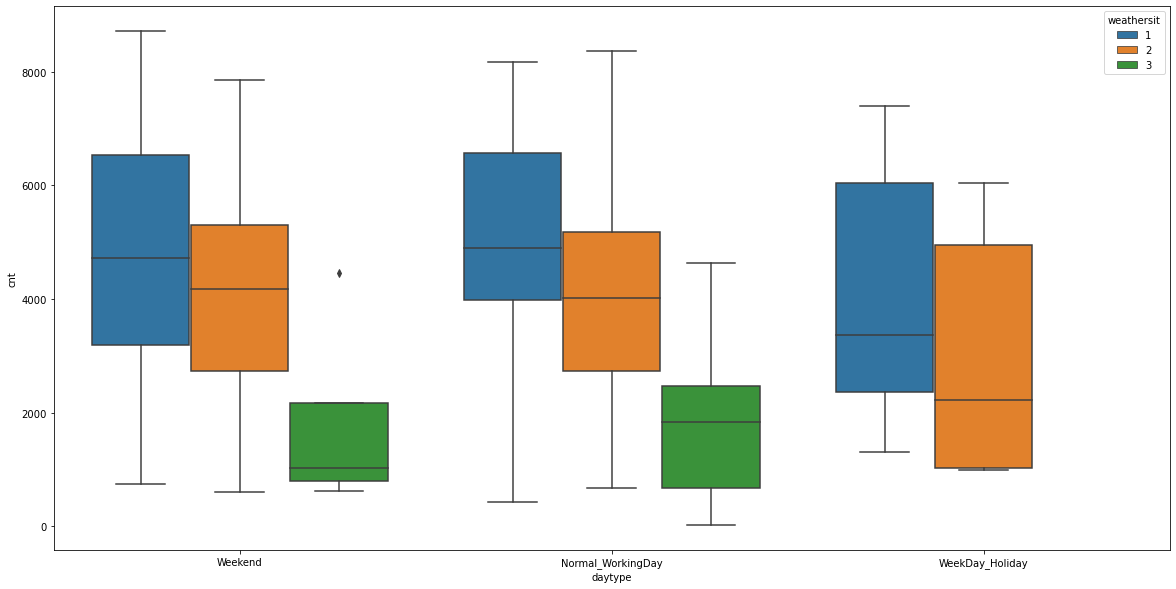

In [40]:
sns.boxplot(x="daytype",y="cnt",data=df3,hue="weathersit")

In [45]:
#in this function we are grouping the data by a categorical variable k and then getting the mean value of no of bikes registered
#by the categories of that particular categorical variable
def mean_plot(k):
    d=df3.groupby(k)["cnt"].mean()
    d.plot(kind="bar")

In [46]:
cat

['season',
 'yr',
 'holiday',
 'workingday',
 'weathersit',
 'Quarter',
 'daytype',
 'dayname',
 'weekend']

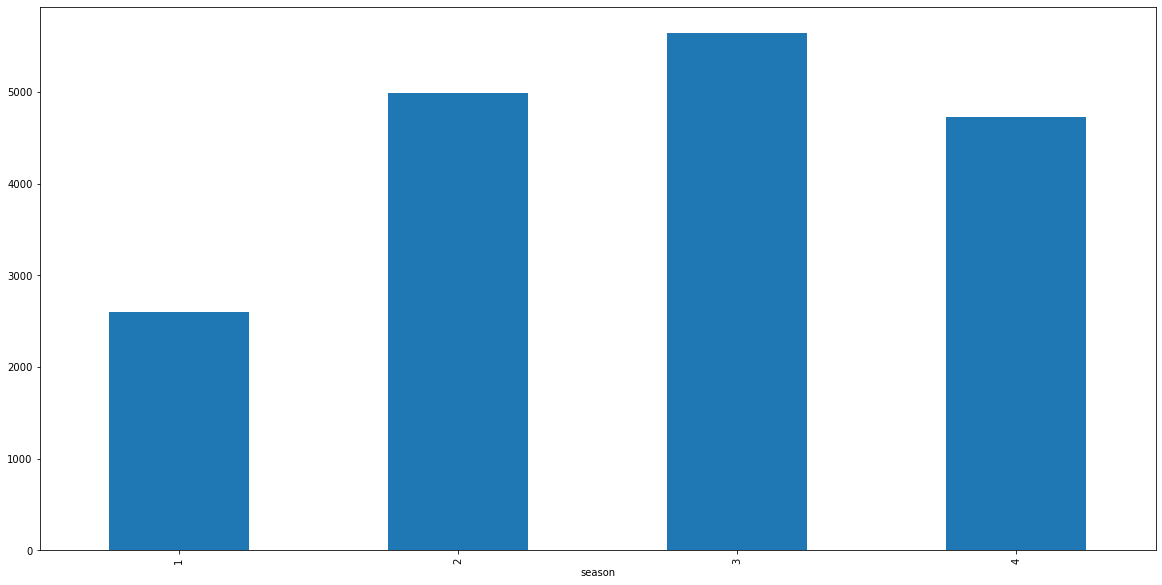

In [47]:
mean_plot(cat[0])

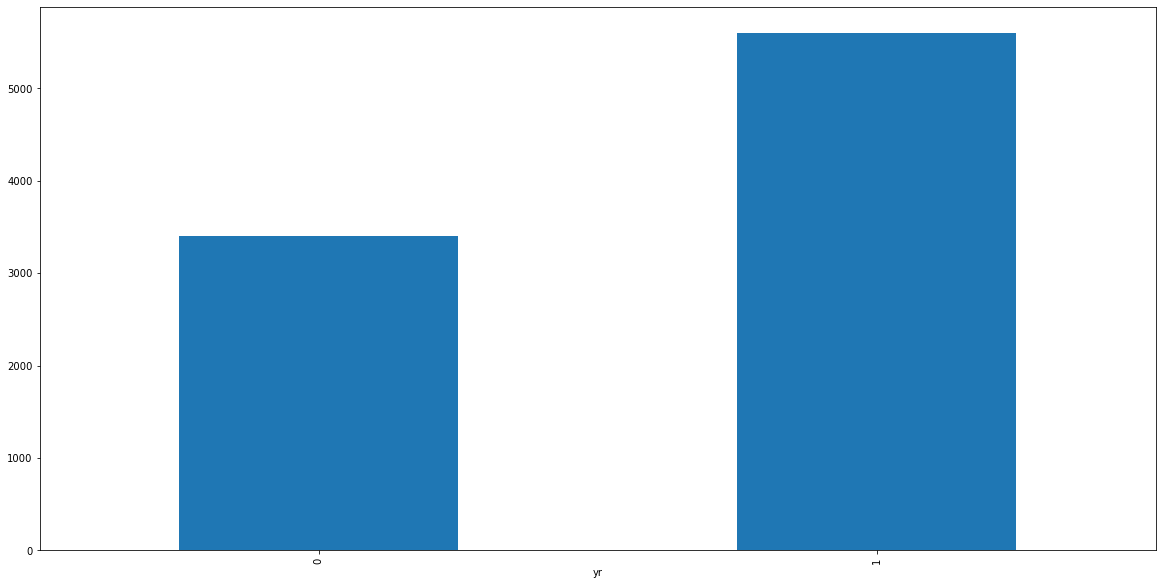

In [48]:
mean_plot(cat[1])

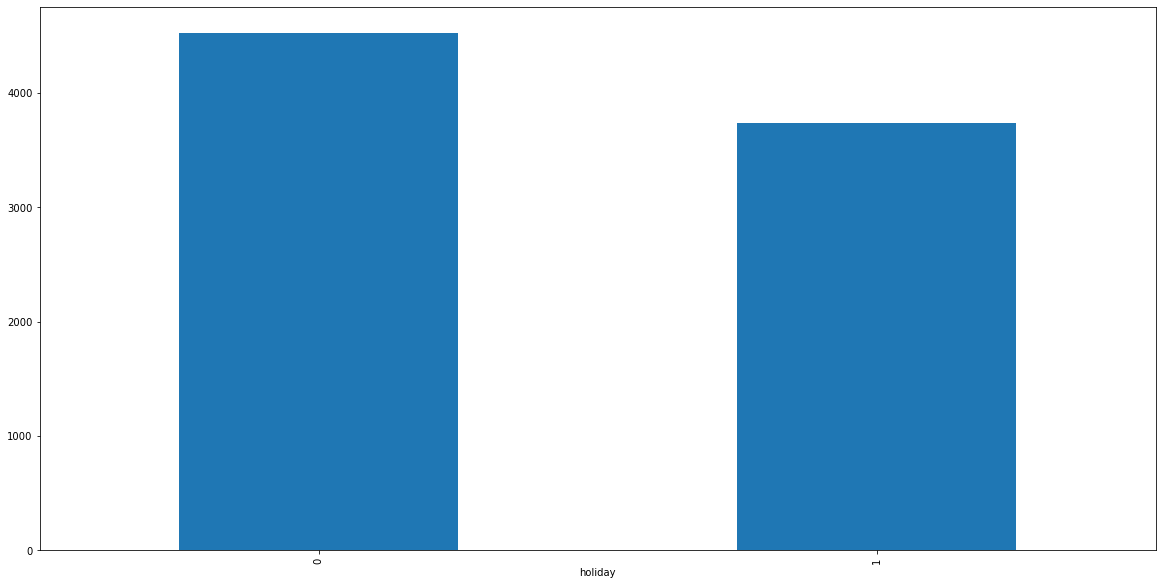

In [49]:
mean_plot(cat[2])

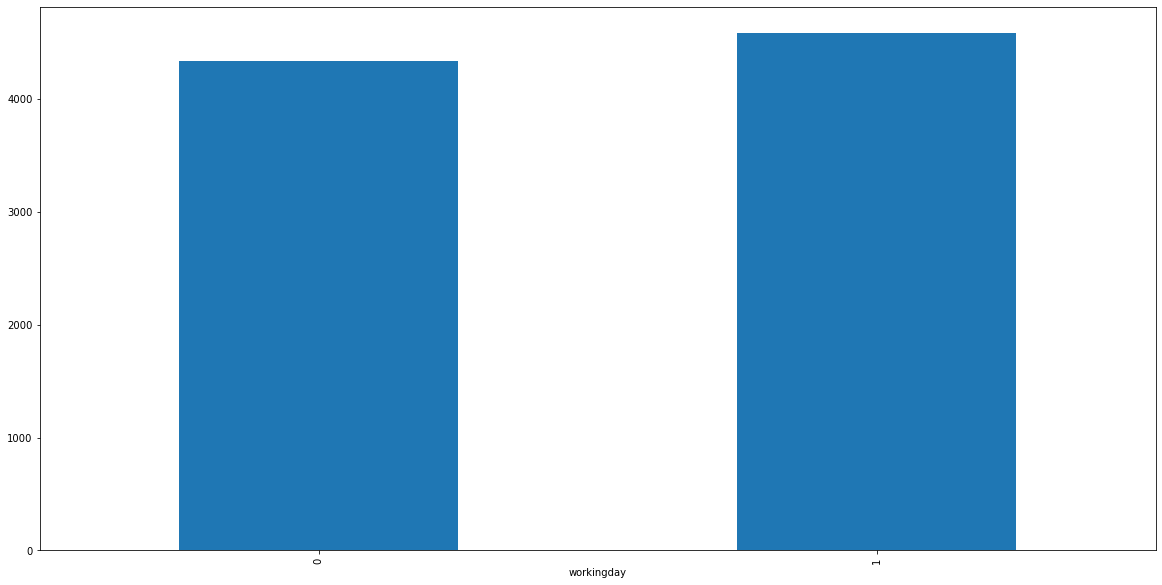

In [50]:
mean_plot(cat[3])

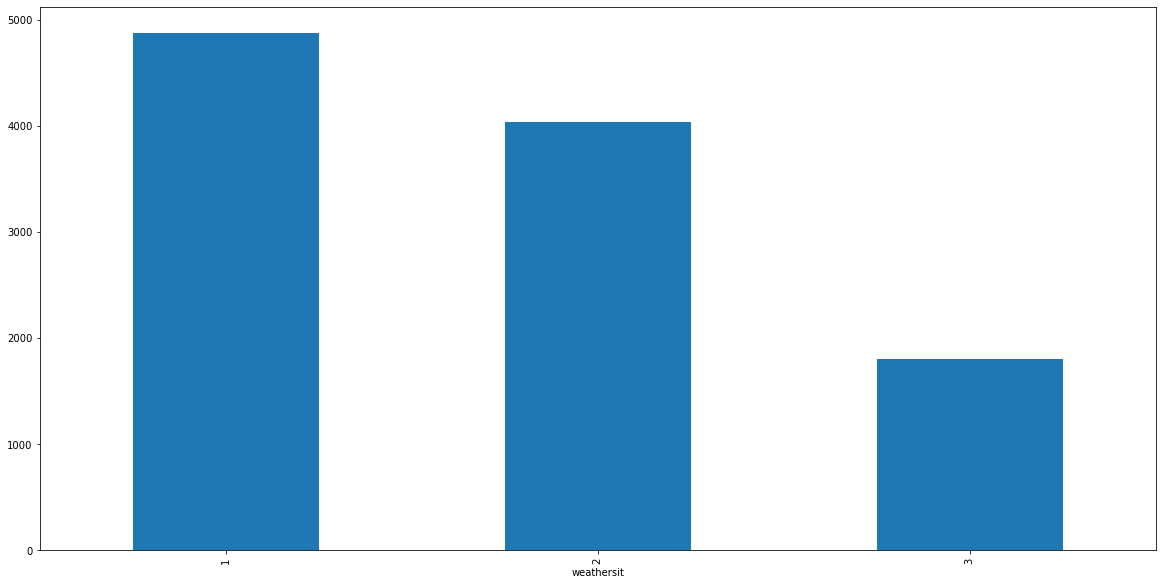

In [51]:
mean_plot(cat[4])

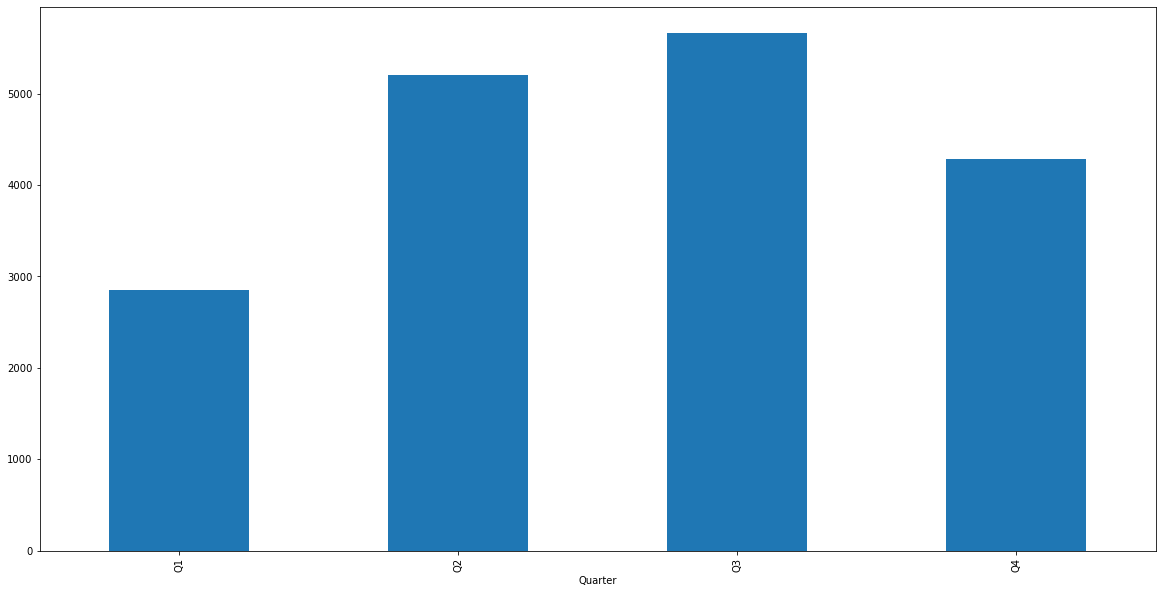

In [52]:
mean_plot(cat[5])

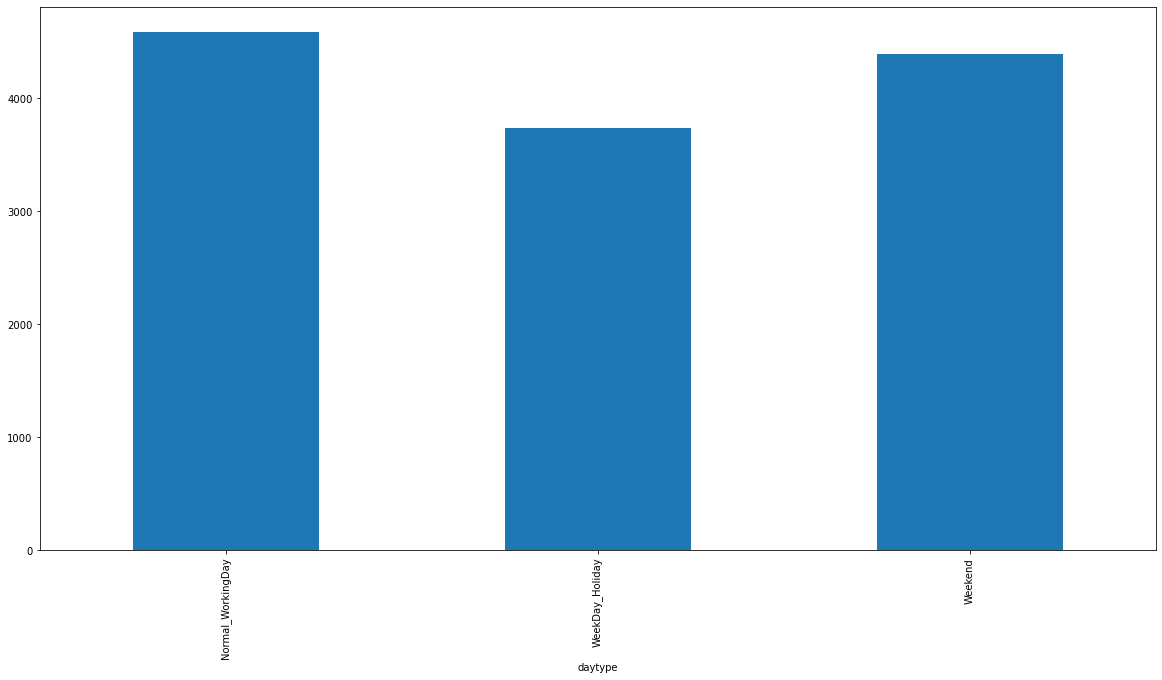

In [53]:
mean_plot(cat[6])

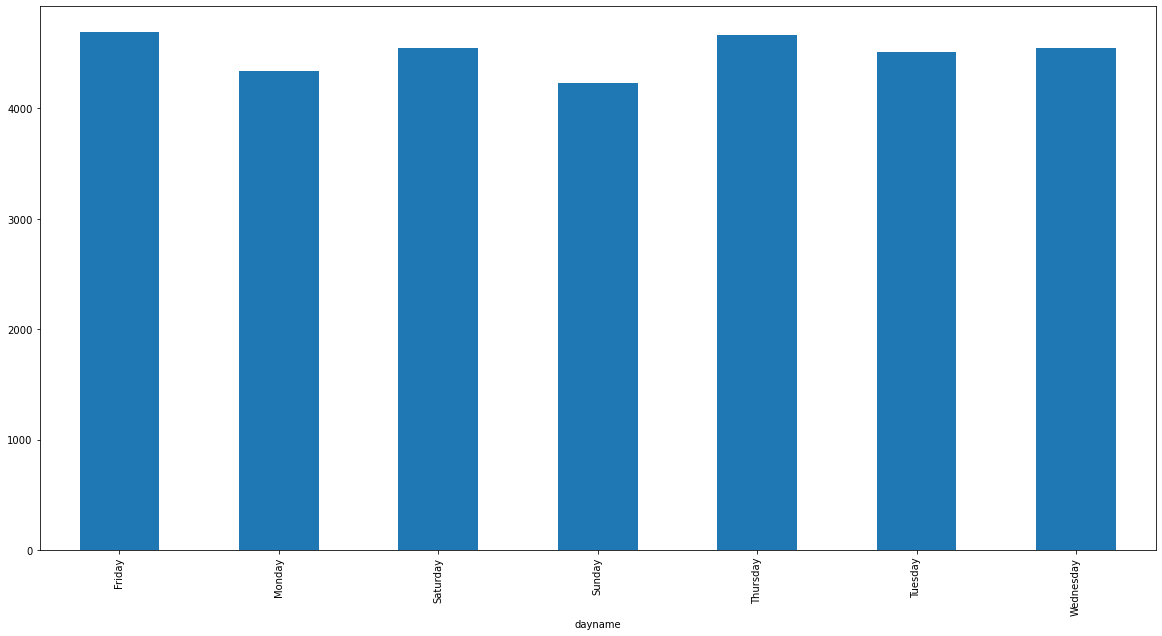

In [54]:
mean_plot(cat[7])

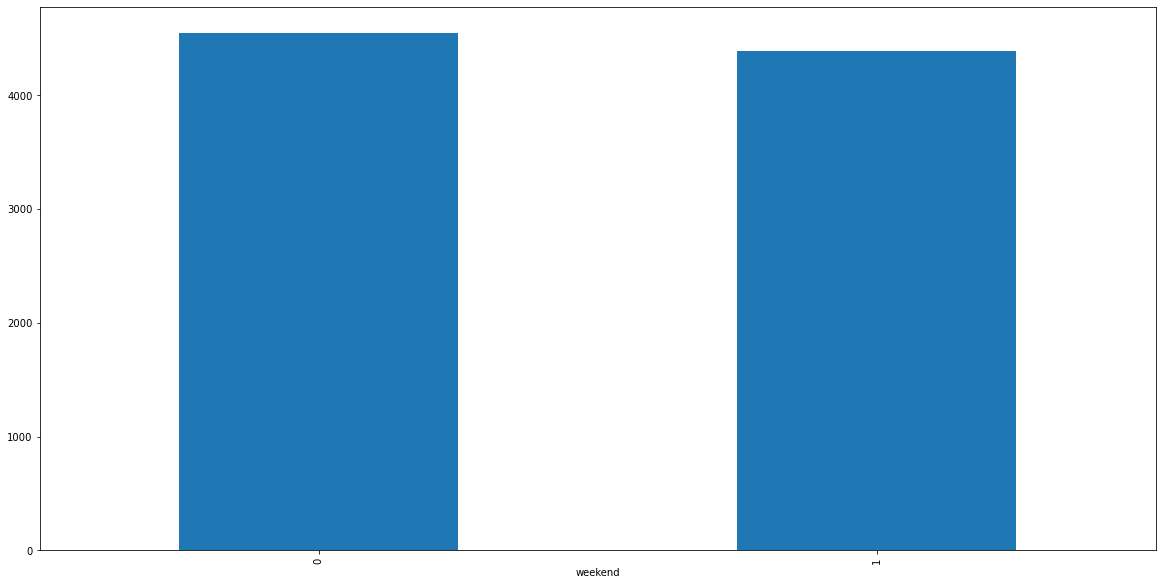

In [55]:
mean_plot(cat[8])

# Normality Check

In [81]:
#Shapiro-Wilk test
from scipy.stats import shapiro
stat, p = shapiro(df1.cnt)
print(stat,p)


#D’Agostino-Pearson Omnibus Test. This test checks if the skewness and kurtosis of the observed dataset significantly deviates
#from a normal distribution
from scipy.stats import normaltest
stat, p = normaltest(df1.cnt)
print(stat,p)

0.9801235198974609 2.080002481363863e-08
62.70766376180256 2.4165947497109103e-14


based on the evidence that we have , our our target column is not normally distributed as the value of p is less than 0.05

# Bivariate analysis

In [57]:
from itertools import combinations

In [58]:

cont

['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [60]:
# we have a list cont which contains the names of all the continuous variables. We are using the combinations from itertools to
#get a list which contains tuples which have the combinations of the variables of cont taken 2 at a time
c=list(combinations(cont,2))
c

[('temp', 'atemp'),
 ('temp', 'hum'),
 ('temp', 'windspeed'),
 ('temp', 'casual'),
 ('temp', 'registered'),
 ('temp', 'cnt'),
 ('atemp', 'hum'),
 ('atemp', 'windspeed'),
 ('atemp', 'casual'),
 ('atemp', 'registered'),
 ('atemp', 'cnt'),
 ('hum', 'windspeed'),
 ('hum', 'casual'),
 ('hum', 'registered'),
 ('hum', 'cnt'),
 ('windspeed', 'casual'),
 ('windspeed', 'registered'),
 ('windspeed', 'cnt'),
 ('casual', 'registered'),
 ('casual', 'cnt'),
 ('registered', 'cnt')]

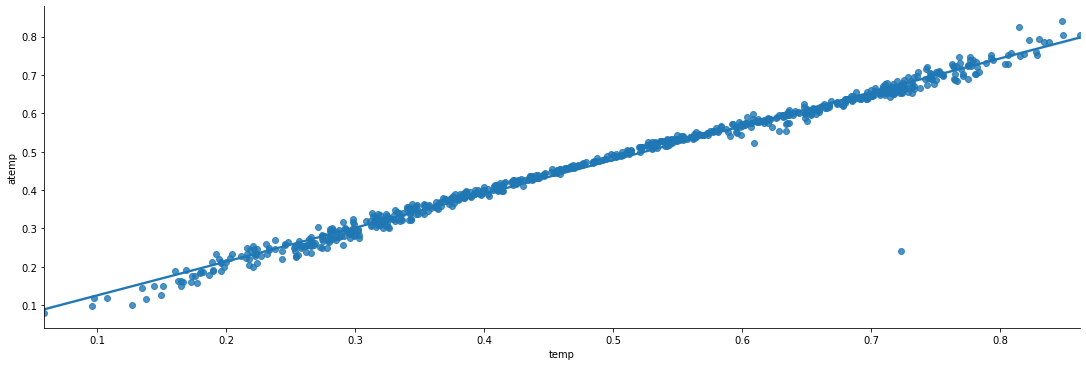

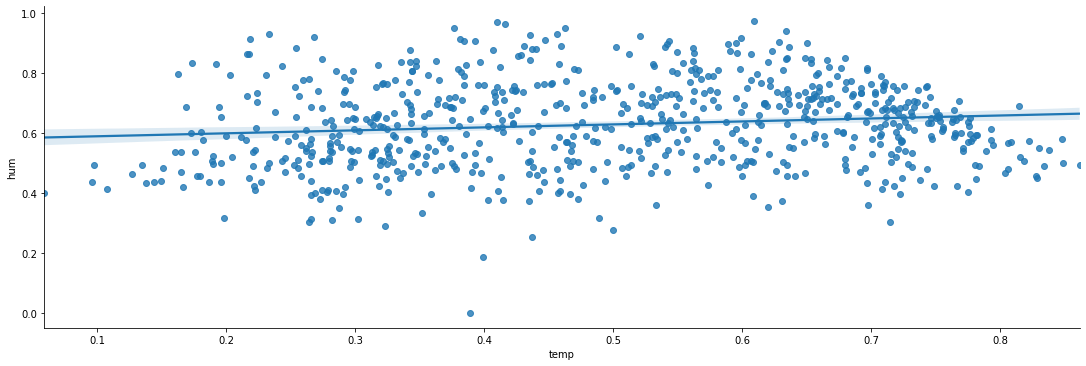

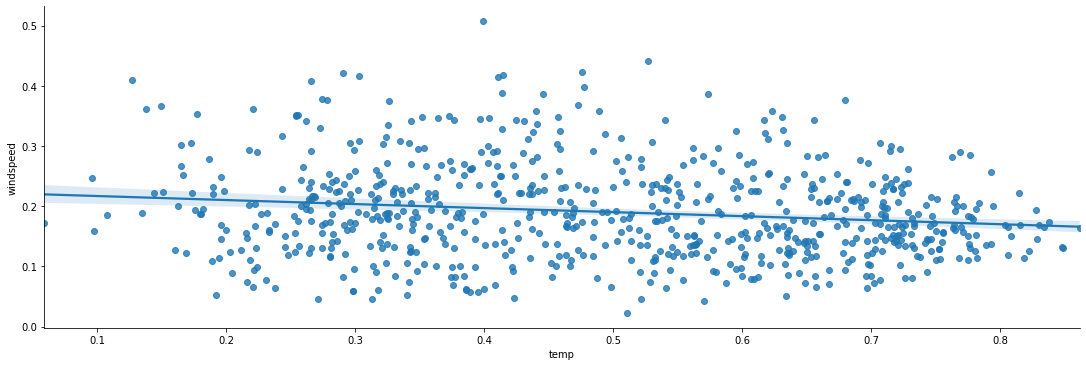

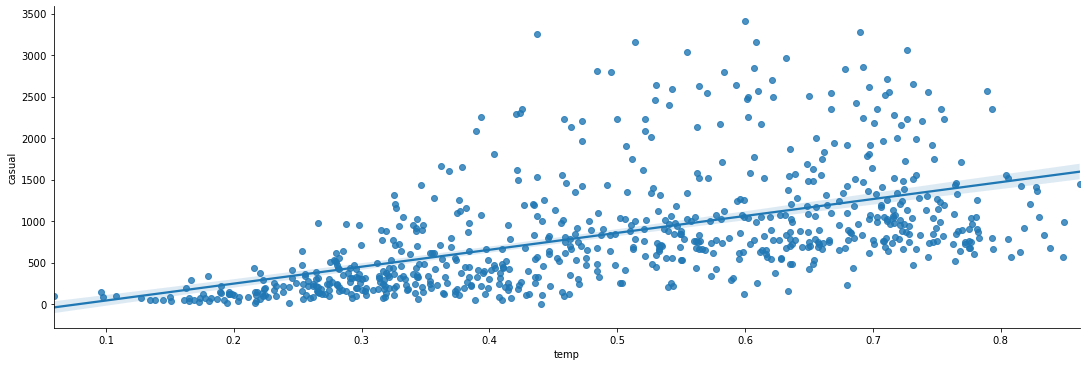

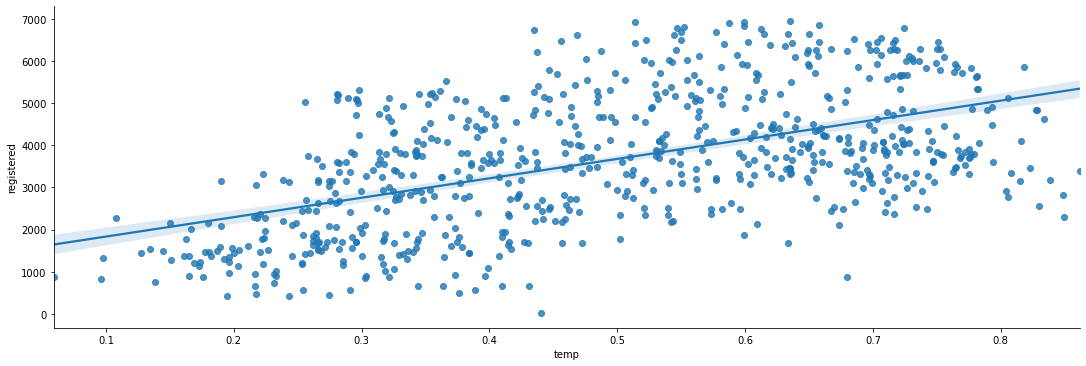

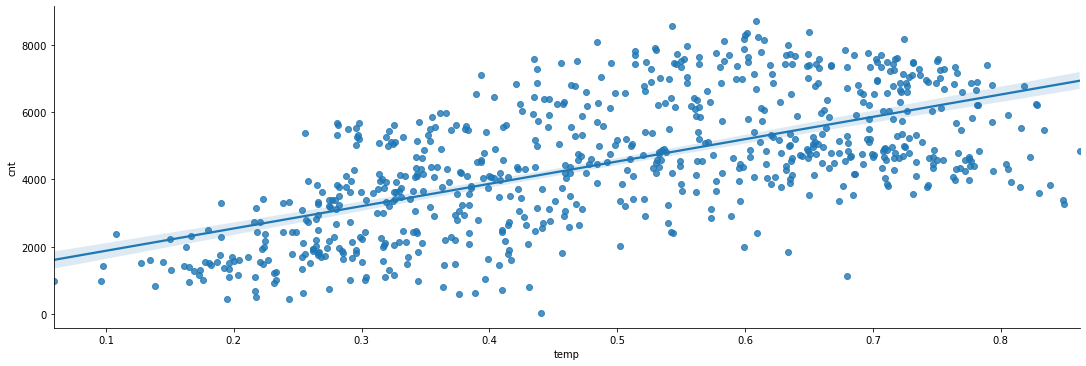

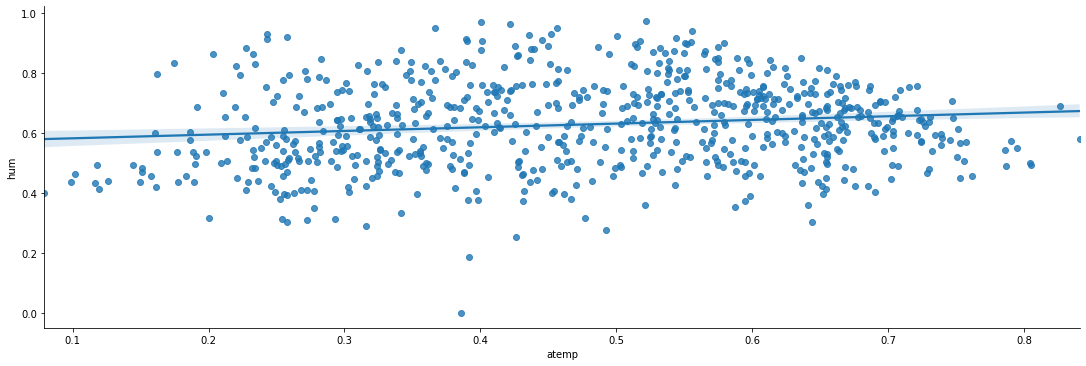

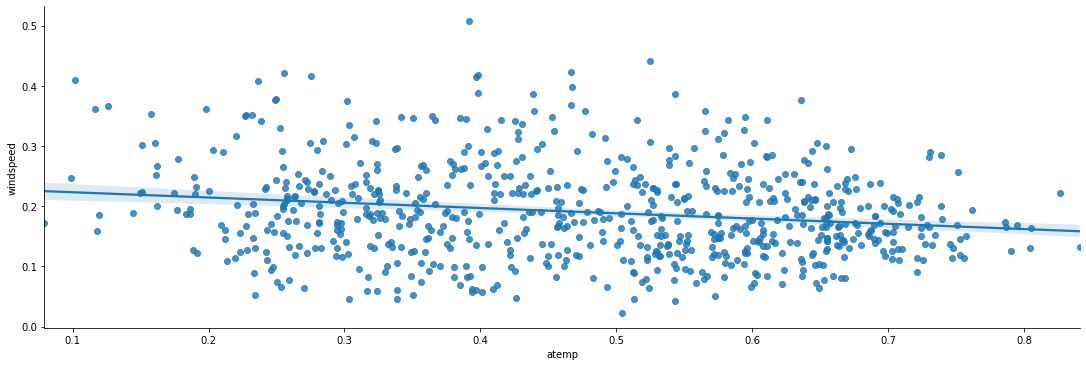

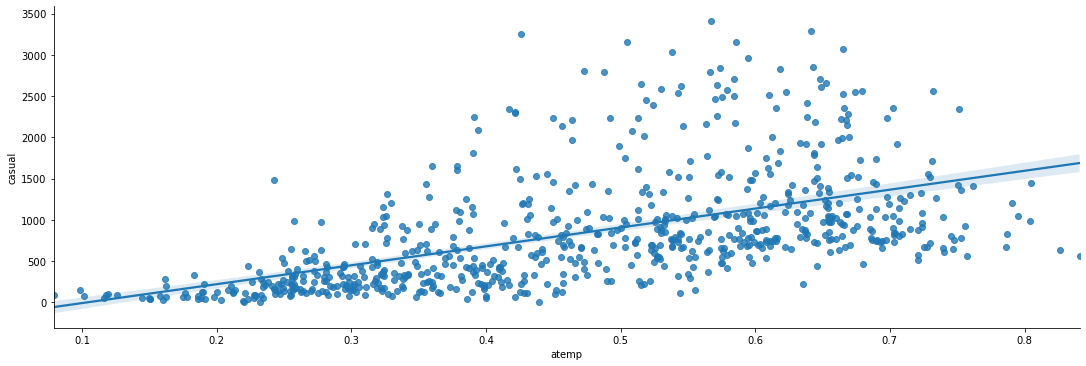

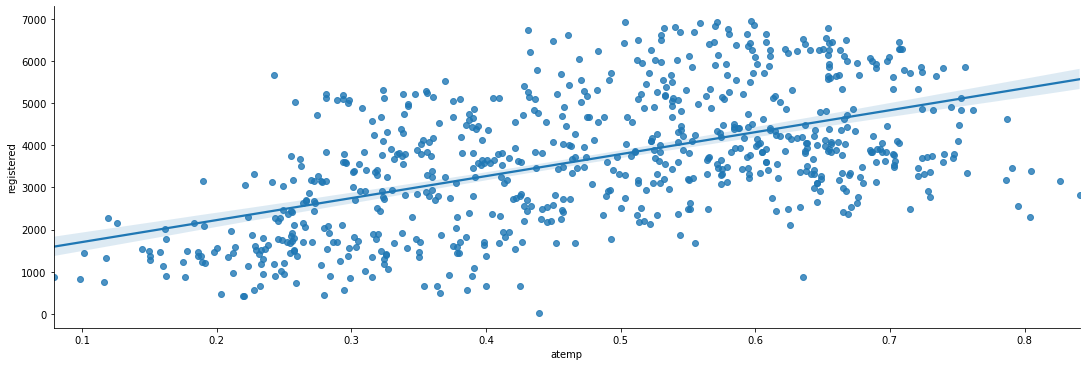

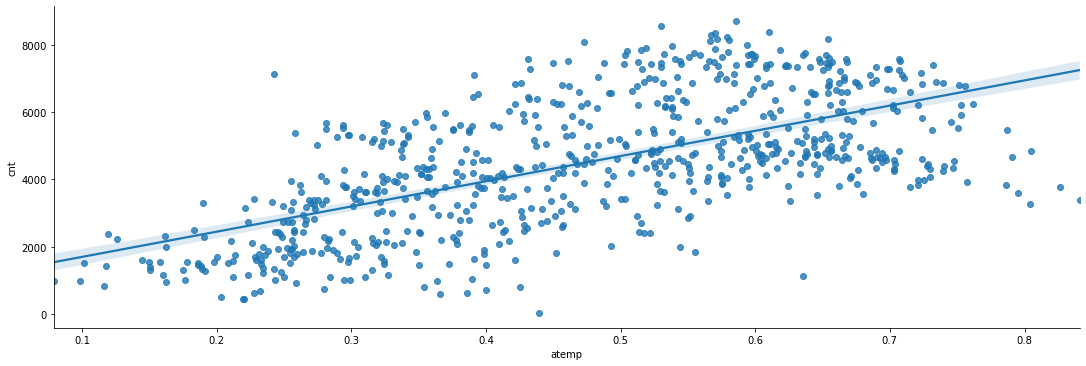

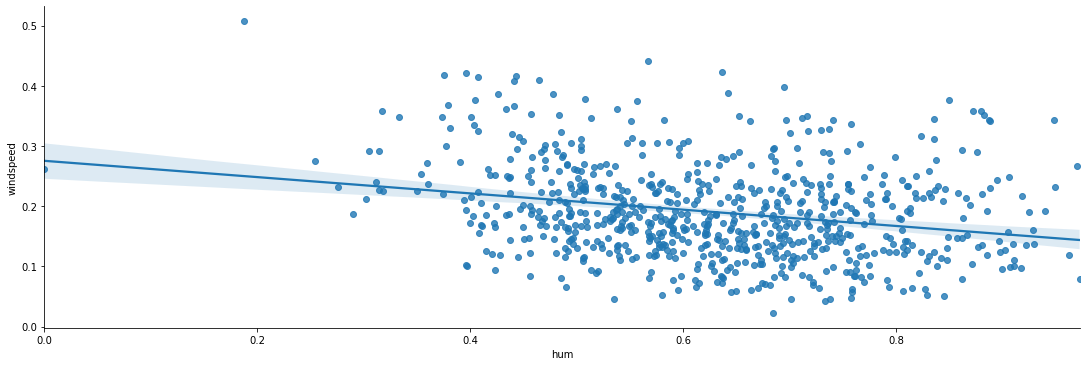

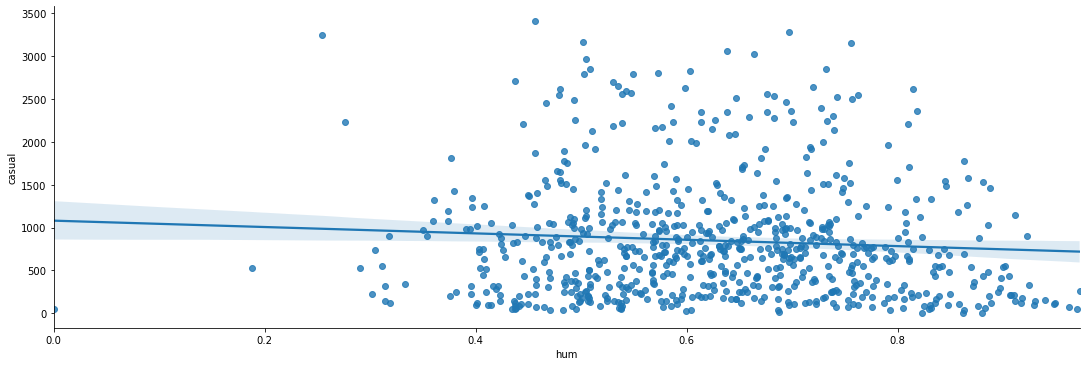

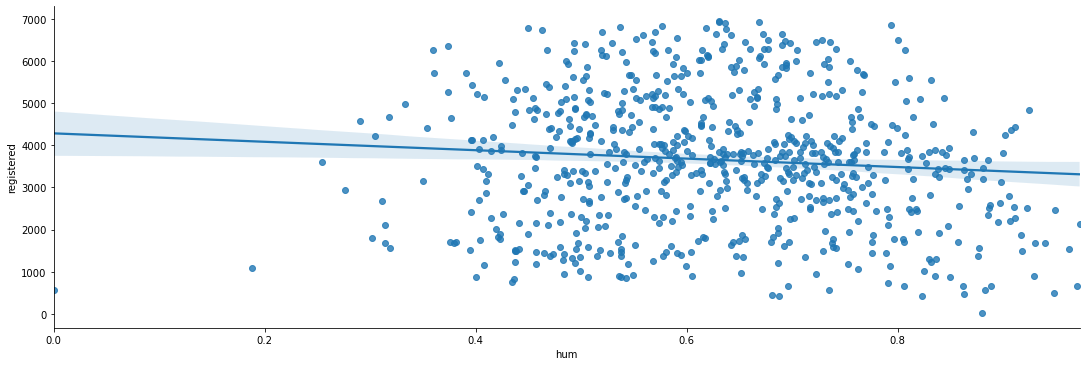

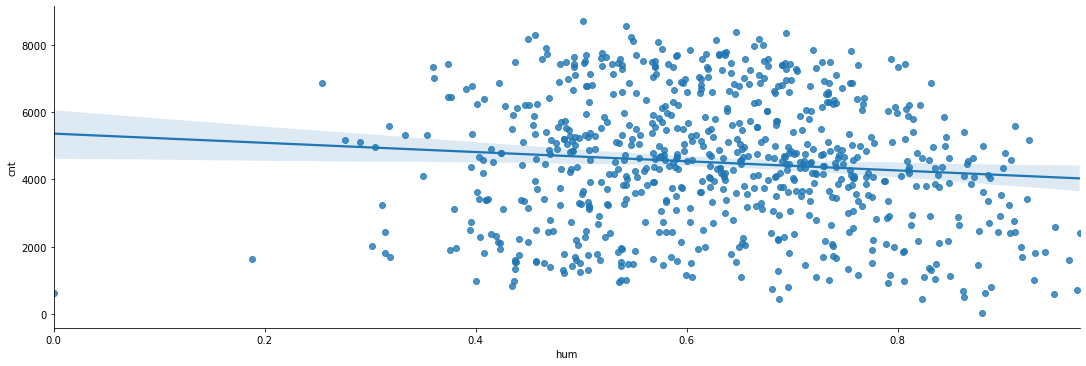

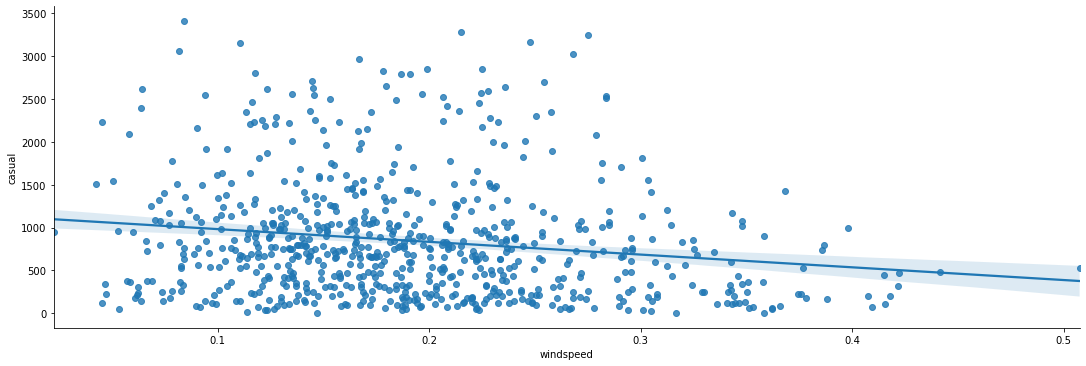

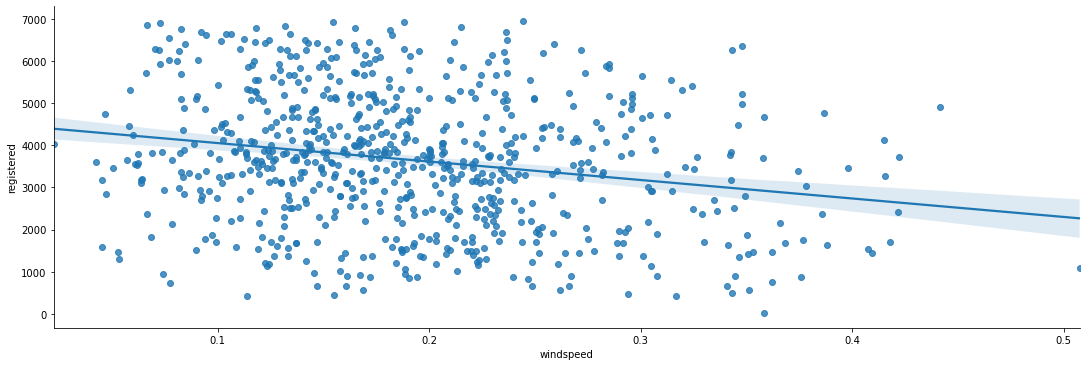

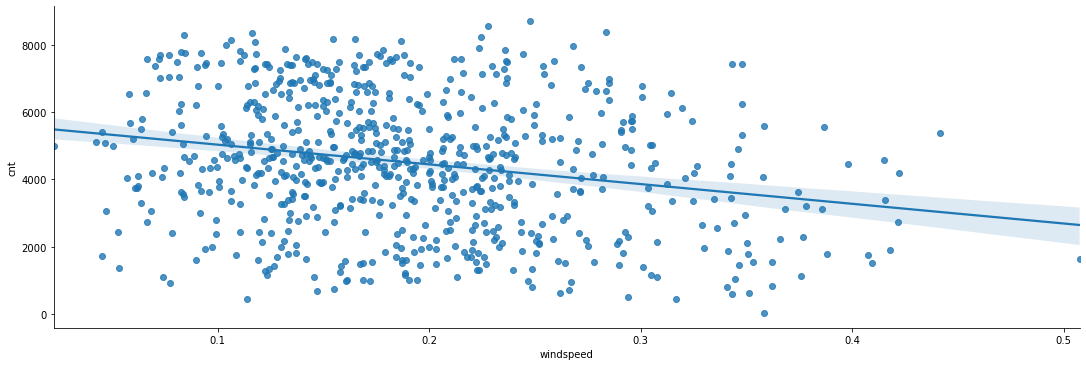

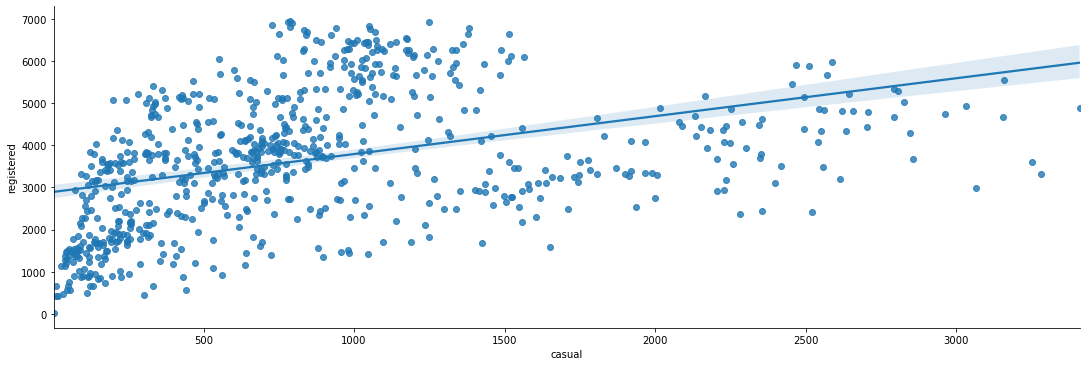

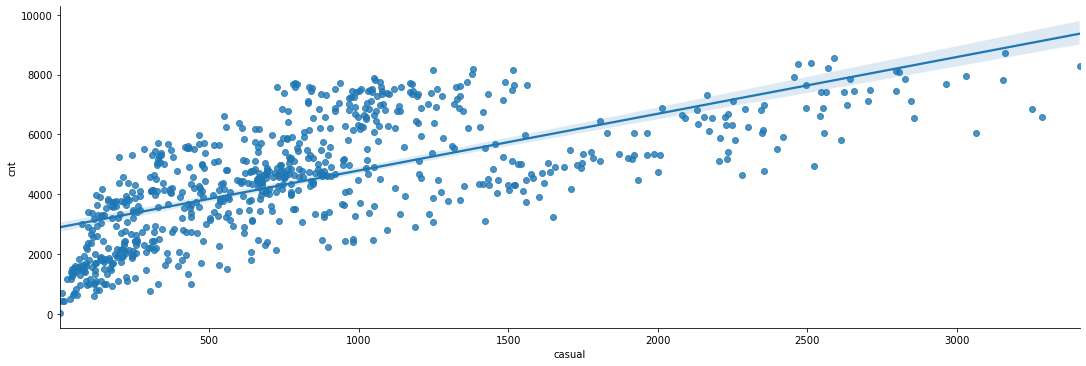

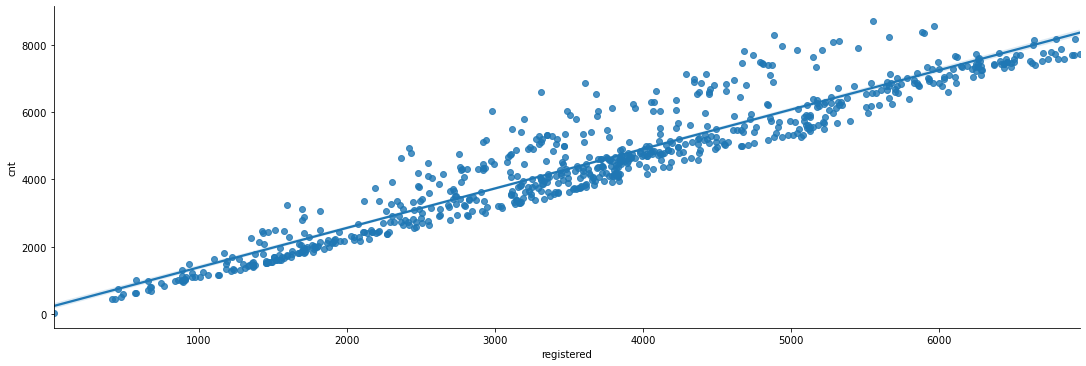

In [61]:
#plotting scatter plot taking 2 continous variables at a time
def scatter(s):
    sns.lmplot(x=s[0],y=s[1],data=df3,aspect=3)

for i in c:
    scatter(i)

In [62]:
y=df3.cnt

In [63]:
#to get the regression equations between the continuous variables and the target variable(one at a time)
import statsmodels.api as sm
def regression_results(x):
    x=sm.add_constant(x)
    model=sm.OLS(y,x).fit()
    print(model.summary())

In [64]:
for i in cont[:-1]:
    v=df3[i]
    print(i)
    regression_results(v)
    print(" ")

temp
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     473.5
Date:                Sat, 18 Jun 2022   Prob (F-statistic):           2.81e-81
Time:                        10:03:20   Log-Likelihood:                -6386.8
No. Observations:                 731   AIC:                         1.278e+04
Df Residuals:                     729   BIC:                         1.279e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1214.6421    161.164      7.537    

# Correlation

In [65]:
from scipy import stats

In [66]:
from itertools import combinations
comb=combinations(cont,2)
c=list(comb)
print(c)

[('temp', 'atemp'), ('temp', 'hum'), ('temp', 'windspeed'), ('temp', 'casual'), ('temp', 'registered'), ('temp', 'cnt'), ('atemp', 'hum'), ('atemp', 'windspeed'), ('atemp', 'casual'), ('atemp', 'registered'), ('atemp', 'cnt'), ('hum', 'windspeed'), ('hum', 'casual'), ('hum', 'registered'), ('hum', 'cnt'), ('windspeed', 'casual'), ('windspeed', 'registered'), ('windspeed', 'cnt'), ('casual', 'registered'), ('casual', 'cnt'), ('registered', 'cnt')]


In [67]:
def corr(x,y):
    s=stats.pearsonr(df1[x],df1[y])
    if(s[1]<0.05):
        print("Correlation coefficient is reliable")
    else:
        print("Correlation coefficient is not reliable")
    print(s)

In [68]:
for i in c:
    print(i)
    corr(i[0],i[1])

('temp', 'atemp')
Correlation coefficient is reliable
(0.9917015532294637, 0.0)
('temp', 'hum')
Correlation coefficient is reliable
(0.12696293902718872, 0.0005800887705373723)
('temp', 'windspeed')
Correlation coefficient is reliable
(-0.15794412041209957, 1.7868574360644856e-05)
('temp', 'casual')
Correlation coefficient is reliable
(0.5432846616821876, 2.3088421872798114e-57)
('temp', 'registered')
Correlation coefficient is reliable
(0.5400119661617863, 1.4462286512707367e-56)
('temp', 'cnt')
Correlation coefficient is reliable
(0.627494009033492, 2.8106223975907754e-81)
('atemp', 'hum')
Correlation coefficient is reliable
(0.13998805994655983, 0.00014640238006982662)
('atemp', 'windspeed')
Correlation coefficient is reliable
(-0.18364296669082852, 5.755773920540957e-07)
('atemp', 'casual')
Correlation coefficient is reliable
(0.5438636902622048, 1.665311920737755e-57)
('atemp', 'registered')
Correlation coefficient is reliable
(0.5441917576380139, 1.3834882576908133e-57)
('atemp',

# TTest

In [69]:
#WE are dividing the data by some attributes and then checking if there is 
#significant difference in the cnt based on those attributes
def ttest(col):
    print(f"FOR {col}")
    W=df3.groupby(col)
    W1=W.get_group(1)
    W0=W.get_group(0)
    print(stats.ttest_ind(W1["cnt"],W0["cnt"]))

In [70]:
df3.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'dayname', 'Quarter', 'daytype', 'weekend'],
      dtype='object')

In [71]:
tc=df3.columns[[1,3,5,-1]]

In [72]:
for i in tc:
    ttest(i)

FOR yr
Ttest_indResult(statistic=18.57123004907546, pvalue=2.4835399044508365e-63)
FOR holiday
Ttest_indResult(statistic=-1.8497137724448645, pvalue=0.06475935792611008)
FOR workingday
Ttest_indResult(statistic=1.6543102137118633, pvalue=0.09849496160024915)
FOR weekend
Ttest_indResult(statistic=-1.01602834564195, pvalue=0.3099529697475421)


As per our T test, there is significant difference in the number of bikes based on year. But based on holiday,workingday and
weekend there is no significant difference

# Tukey Test

In [82]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd,MultiComparison

In [83]:
def tukey(c):
    mc=MultiComparison(df3["cnt"],df3[c])
    mcresult=mc.tukeyhsd(0.05)
    print(mcresult.summary())

In [84]:
for i in cat:
    print(i)
    tukey(i)

season
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff p-adj    lower      upper   reject
----------------------------------------------------------
     1      2 2388.1989  0.001  1965.3265 2811.0714   True
     1      3 3040.1706  0.001  2619.5349 3460.8063   True
     1      4 2124.0303  0.001  1697.6383 2550.4224   True
     2      3  651.9717  0.001   233.0867 1070.8566   True
     2      4 -264.1686 0.3792  -688.8337  160.4965  False
     3      4 -916.1403  0.001 -1338.5781 -493.7025   True
----------------------------------------------------------
yr
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj   lower     upper   reject
--------------------------------------------------------
     0      1 2194.1728 0.001 1962.2198 2426.1257   True
--------------------------------------------------------
holiday
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper  

Based on tukey test, 
In season there is no significant difference in number of bikes in season 2 and 4.For other combinations, there is significant difference.
There is no significant difference based on holiday,daytype,dayname,workingday and weekends.
There is significant difference based on weathersituation,year and quarter.


# ZTest for propertions

In [76]:
from statsmodels.stats.proportion import proportions_ztest

In [77]:
#We are checking if there is a significant difference in the propertion of registered users out of the total users based
#on various parameters
def prop_test_registered(c):
    print(c)
    h=df3.groupby(c)
    h1=h["registered","cnt"].sum()
    print(h1)
    stat, pval = proportions_ztest(h1["registered"], h1["cnt"])
    print(stat)
    print(pval)
    print("  ")

In [78]:
for i in tc:
    prop_test_registered(i)

yr
    registered      cnt
yr                     
0       995851  1243103
1      1676811  2049576
-38.30624373430995
0.0
  
holiday
         registered      cnt
holiday                     
0           2616586  3214244
1             56076    78435
70.1572169516443
0.0
  
workingday
            registered      cnt
workingday                     
0               683537  1000269
1              1989125  2292410
-393.4974769809647
0.0
  
weekend
         registered      cnt
weekend                     
0           2045201  2370845
1            627461   921834
379.2308780078829
0.0
  


# Trying to  check non-linear dependency

In [79]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [80]:
for i in c:
    dt=DecisionTreeRegressor(max_depth=10)
    x=df3[i[0]].values.reshape(-1,1)
    y=df3[i[1]].values
    scores=cross_val_score(dt,x,y,cv=5,scoring="r2")
    print(i)
    print(scores.mean())

('temp', 'atemp')
0.9273013281898284
('temp', 'hum')
-0.5005791378830993
('temp', 'windspeed')
-0.6620005962529303
('temp', 'casual')
-0.830035751286314
('temp', 'registered')
-2.8286824522003755
('temp', 'cnt')
-2.5650820118998796
('atemp', 'hum')
-0.4427611549820753
('atemp', 'windspeed')
-0.6616829497788979
('atemp', 'casual')
-0.8901147522445132
('atemp', 'registered')
-2.55339869581008
('atemp', 'cnt')
-2.4412770799247254
('hum', 'windspeed')
-0.38457698152790887
('hum', 'casual')
-1.6878144050692914
('hum', 'registered')
-2.9971769519641804
('hum', 'cnt')
-3.3450593696224558
('windspeed', 'casual')
-1.6571377437095662
('windspeed', 'registered')
-2.5473159201177324
('windspeed', 'cnt')
-3.044809378448668
('casual', 'registered')
-2.025416891274502
('casual', 'cnt')
-1.3184549712272857
('registered', 'cnt')
0.30376954962870767


We found no additional dependency

# Modelling

In [85]:
df4=df3.copy()

In [86]:
df4.reset_index(inplace=True)

In [87]:
df4.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,dayname,Quarter,daytype,weekend
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Saturday,Q1,Weekend,1
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Sunday,Q1,Weekend,1
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Monday,Q1,Normal_WorkingDay,0
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Tuesday,Q1,Normal_WorkingDay,0
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Wednesday,Q1,Normal_WorkingDay,0


In [88]:
cont

['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [89]:
#since atemp and temp are having high correlation, we are not taking the temp for modelling
cont1=cont[1:4]
cont1

['atemp', 'hum', 'windspeed']

In [90]:
df4.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'dayname', 'Quarter', 'daytype', 'weekend'],
      dtype='object')

In [91]:
cat

['season',
 'yr',
 'holiday',
 'workingday',
 'weathersit',
 'Quarter',
 'daytype',
 'dayname',
 'weekend']

In [93]:
# we are not taking holiday,workingday,dayname and weekend into modelling as the useful information from those variables are
#almost captured in the daytype variable
cat1=['season','yr','weathersit',
 'Quarter','daytype']

In [94]:
y=df4.cnt

In [95]:
df_cont=df4[cont1]
df_cat=df4[cat1]

In [96]:
#changing the datatype to strings
for i in cat1:
    df_cat[i]=df_cat[i].apply(lambda x:str(x))

In [97]:
dum_cat=pd.get_dummies(df_cat,drop_first=True)

In [98]:
dum_cat.head()

,season_2,season_3,season_4,yr_1,weathersit_2,weathersit_3,Quarter_Q2,Quarter_Q3,Quarter_Q4,daytype_WeekDay_Holiday,daytype_Weekend
0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [99]:
df_cont.describe()

,atemp,hum,windspeed
count,731.000000,731.000000,731.000000
mean,0.474354,0.627894,0.190486
std,0.162961,0.142429,0.077498
min,0.079070,0.000000,0.022392
25%,0.337842,0.520000,0.134950
50%,0.486733,0.626667,0.180975
75%,0.608602,0.730209,0.233214
max,0.840896,0.972500,0.507463


As values of the continous variables are already between 0 and 1,we are not applying any scaling 

In [100]:
X=pd.concat([dum_cat,df_cont],axis=1)

In [101]:
X.head()

,season_2,season_3,season_4,yr_1,weathersit_2,weathersit_3,Quarter_Q2,Quarter_Q3,Quarter_Q4,daytype_WeekDay_Holiday,daytype_Weekend,atemp,hum,windspeed
0,0,0,0,0,1,0,0,0,0,0,1,0.363625,0.805833,0.160446
1,0,0,0,0,1,0,0,0,0,0,1,0.353739,0.696087,0.248539
2,0,0,0,0,0,0,0,0,0,0,0,0.189405,0.437273,0.248309
3,0,0,0,0,0,0,0,0,0,0,0,0.212122,0.590435,0.160296
4,0,0,0,0,0,0,0,0,0,0,0,0.229270,0.436957,0.186900


# Linear Regression

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [103]:
def regression_results(x,y):
    x=sm.add_constant(x)
    model=sm.OLS(y,x).fit()
    print(model.summary())

In [104]:
regression_results(X,y)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     239.2
Date:                Sat, 18 Jun 2022   Prob (F-statistic):          9.75e-259
Time:                        11:51:44   Log-Likelihood:                -5935.0
No. Observations:                 731   AIC:                         1.190e+04
Df Residuals:                     716   BIC:                         1.197e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

In [105]:
#dropping irrelevant features which had associated p values greater than 0.05
X1=X.drop(["Quarter_Q2","Quarter_Q3","daytype_Weekend"],axis=1)
X1

,season_2,season_3,season_4,yr_1,weathersit_2,weathersit_3,Quarter_Q4,daytype_WeekDay_Holiday,atemp,hum,windspeed
0,0,0,0,0,1,0,0,0,0.363625,0.805833,0.160446
1,0,0,0,0,1,0,0,0,0.353739,0.696087,0.248539
2,0,0,0,0,0,0,0,0,0.189405,0.437273,0.248309
3,0,0,0,0,0,0,0,0,0.212122,0.590435,0.160296
4,0,0,0,0,0,0,0,0,0.229270,0.436957,0.186900
...,...,...,...,...,...,...,...,...,...,...,...
726,0,0,0,1,1,0,1,0,0.226642,0.652917,0.350133
727,0,0,0,1,1,0,1,0,0.255046,0.590000,0.155471
728,0,0,0,1,1,0,1,0,0.242400,0.752917,0.124383
729,0,0,0,1,0,0,1,0,0.231700,0.483333,0.350754


In [106]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.30)

In [107]:
lr=LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.7746225640948208

array([[<AxesSubplot:title={'center':'cnt'}>]], dtype=object)

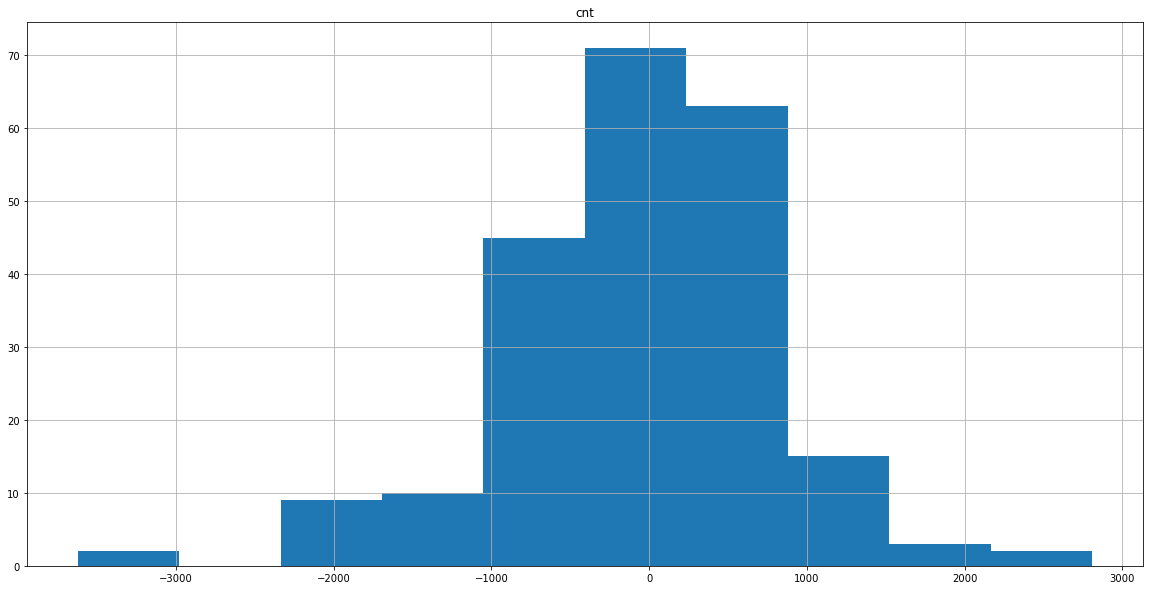

In [108]:
#checking the distribution of errors to see if they are forming the bell curve(approximately)
er=y_test-lr.predict(X_test)
e=pd.DataFrame(er)
e.hist()

# DecisionTreeRegression

At first we used didnot specify any parameter. Then we performed Hyperparameter tuning using GridSearchCV to get the best parameters out of the parameters that we have supplied

In [109]:
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
dt.score(X_test,y_test)

0.7037814317006534

In [110]:
#gridsearchcv to find the best parameters for Decision Tree Regression
dt=DecisionTreeRegressor()
from sklearn.model_selection import GridSearchCV 
params={'max_depth':list(range(6,12)),'max_leaf_nodes':list(range(10,18)),
        'min_samples_leaf':list(range(10,16)),'min_samples_split':list(range(10,16))}
clf = GridSearchCV(dt, params)
clf.fit(X_train,y_train)
clf.best_params_

{'max_depth': 6,
 'max_leaf_nodes': 17,
 'min_samples_leaf': 13,
 'min_samples_split': 10}

In [111]:
dt1=clf.best_estimator_

In [112]:
dt1.score(X_test,y_test)

0.7165943922560158

# Ridge and Lasso Regression

In [113]:
#We will vary the lambda parameters
a=np.logspace(-7,0,50)
a

array([1.00000000e-07, 1.38949549e-07, 1.93069773e-07, 2.68269580e-07,
       3.72759372e-07, 5.17947468e-07, 7.19685673e-07, 1.00000000e-06,
       1.38949549e-06, 1.93069773e-06, 2.68269580e-06, 3.72759372e-06,
       5.17947468e-06, 7.19685673e-06, 1.00000000e-05, 1.38949549e-05,
       1.93069773e-05, 2.68269580e-05, 3.72759372e-05, 5.17947468e-05,
       7.19685673e-05, 1.00000000e-04, 1.38949549e-04, 1.93069773e-04,
       2.68269580e-04, 3.72759372e-04, 5.17947468e-04, 7.19685673e-04,
       1.00000000e-03, 1.38949549e-03, 1.93069773e-03, 2.68269580e-03,
       3.72759372e-03, 5.17947468e-03, 7.19685673e-03, 1.00000000e-02,
       1.38949549e-02, 1.93069773e-02, 2.68269580e-02, 3.72759372e-02,
       5.17947468e-02, 7.19685673e-02, 1.00000000e-01, 1.38949549e-01,
       1.93069773e-01, 2.68269580e-01, 3.72759372e-01, 5.17947468e-01,
       7.19685673e-01, 1.00000000e+00])

In [114]:
from sklearn.linear_model import Ridge as ridge,Lasso as lasso

In [115]:
ridge_score=[]
lasso_score=[]
for i in a:
    r=ridge(alpha=i)
    l=lasso(alpha=i)
    r.fit(X_train,y_train)
    l.fit(X_train,y_train)
    ridge_score.append(r.score(X_test,y_test))
    lasso_score.append(l.score(X_test,y_test))

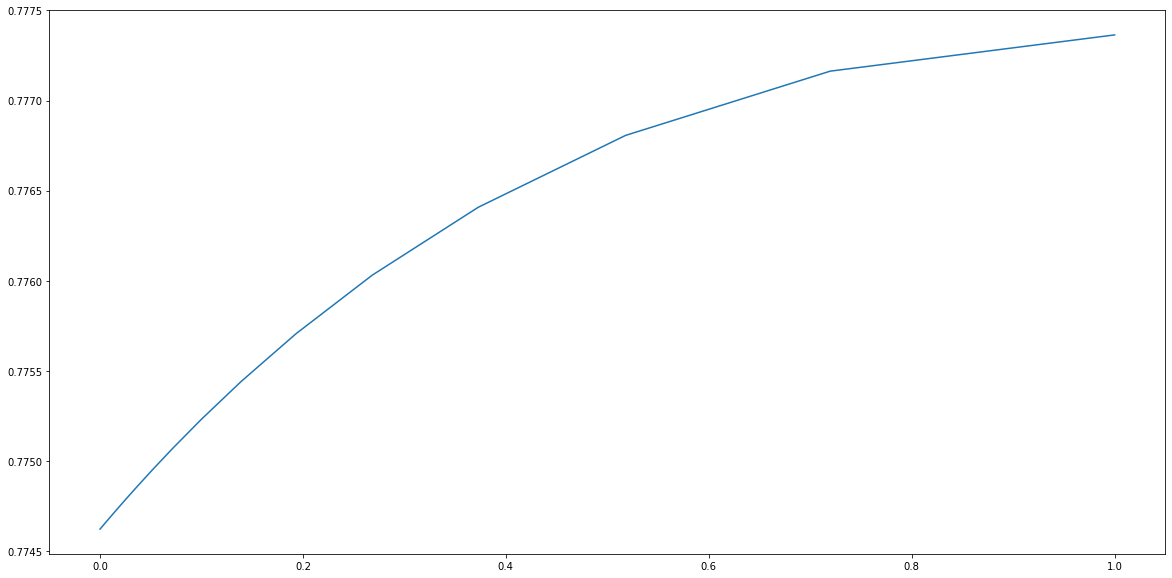

In [116]:
#plotting the scores
plt.plot(a,ridge_score)

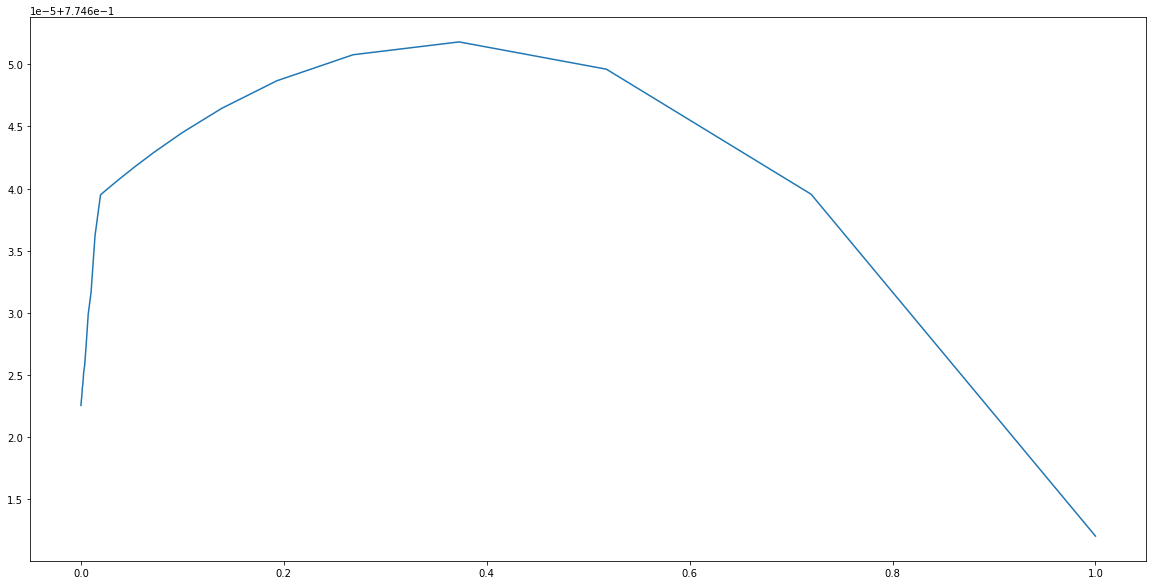

In [117]:
plt.plot(a,lasso_score)

Ridge regression works fairly well while lasso regression fails horribly.

# AdaboostRegressor

In [118]:
from sklearn.ensemble import AdaBoostRegressor
lr=LinearRegression()
rscore=[]
for i in range(50,5000,50):
    reg_ada=AdaBoostRegressor(base_estimator=lr,n_estimators=i)
    reg_ada.fit(X_train,y_train)
    c=reg_ada.score(X_test,y_test)
    rscore.append(c)

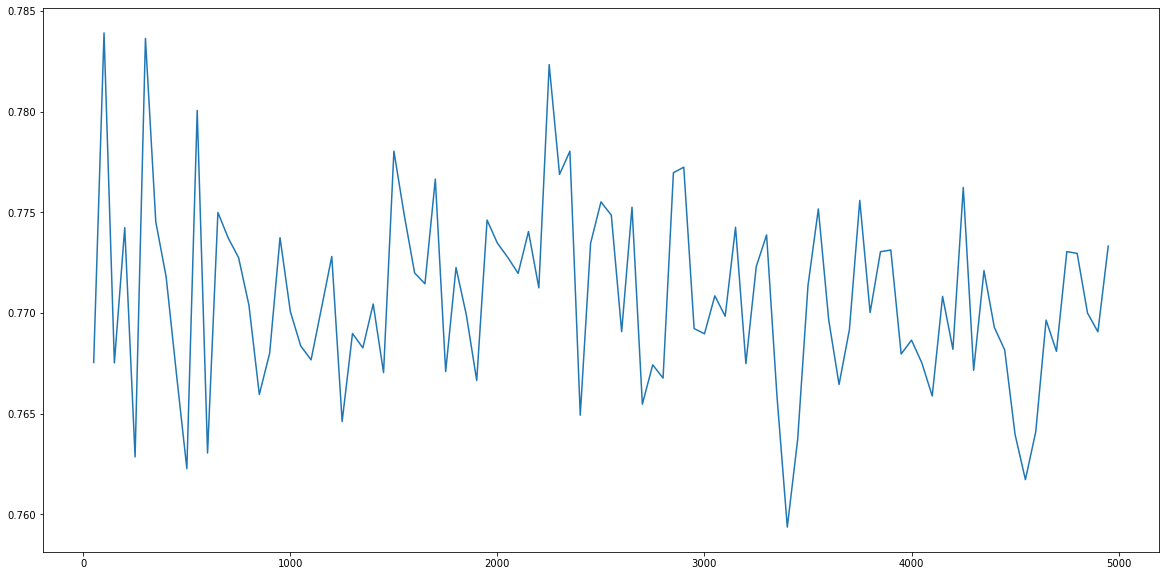

In [119]:
plt.plot(list(range(50,5000,50)),rscore)

In [120]:
max(rscore)

0.7839044542871523

In [121]:
dt=DecisionTreeRegressor(max_depth=6,
 max_leaf_nodes= 17,
 min_samples_leaf= 13,
 min_samples_split= 10)
rscore=[]
for i in range(50,5000,50):
    reg_ada=AdaBoostRegressor(base_estimator=dt,n_estimators=i)
    reg_ada.fit(X_train,y_train)
    y_pred=reg_ada.predict(X_test)
    rscore.append(r2_score(y_test,y_pred))

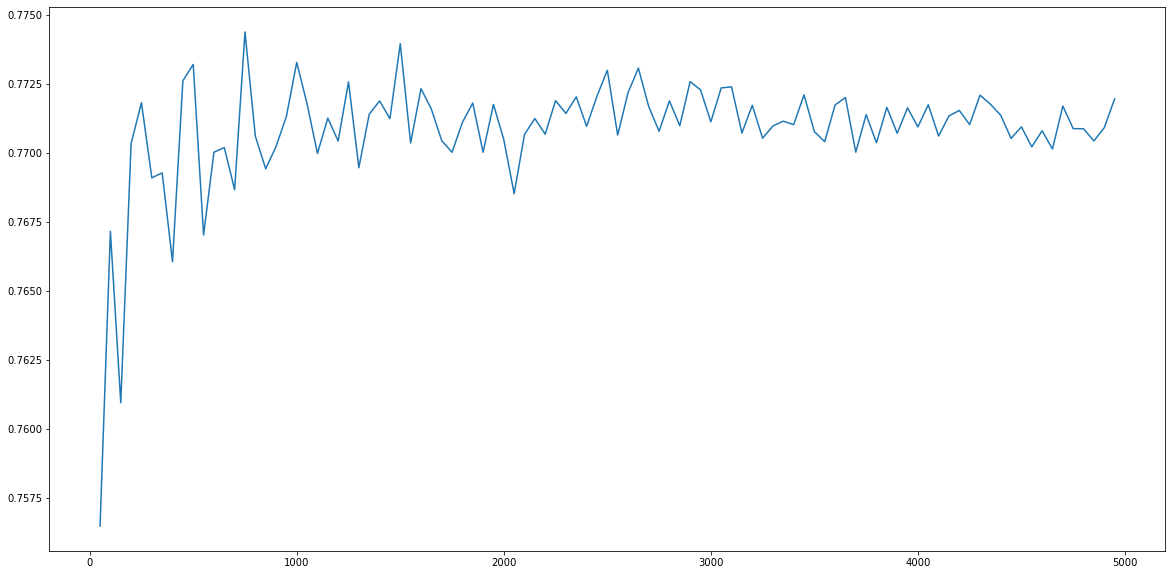

In [122]:
plt.plot(list(range(50,5000,50)),rscore)

In [123]:
max(rscore)

0.7744023956264535

# GradientBoostRegressor

In [124]:
from sklearn.ensemble import GradientBoostingRegressor

In [125]:
rscore=[]
for i in range(50,5000,50):
    reg_gb=GradientBoostingRegressor(n_estimators=i)
    reg_gb.fit(X_train,y_train)
    c=reg_gb.score(X_test,y_test)
    rscore.append(c)

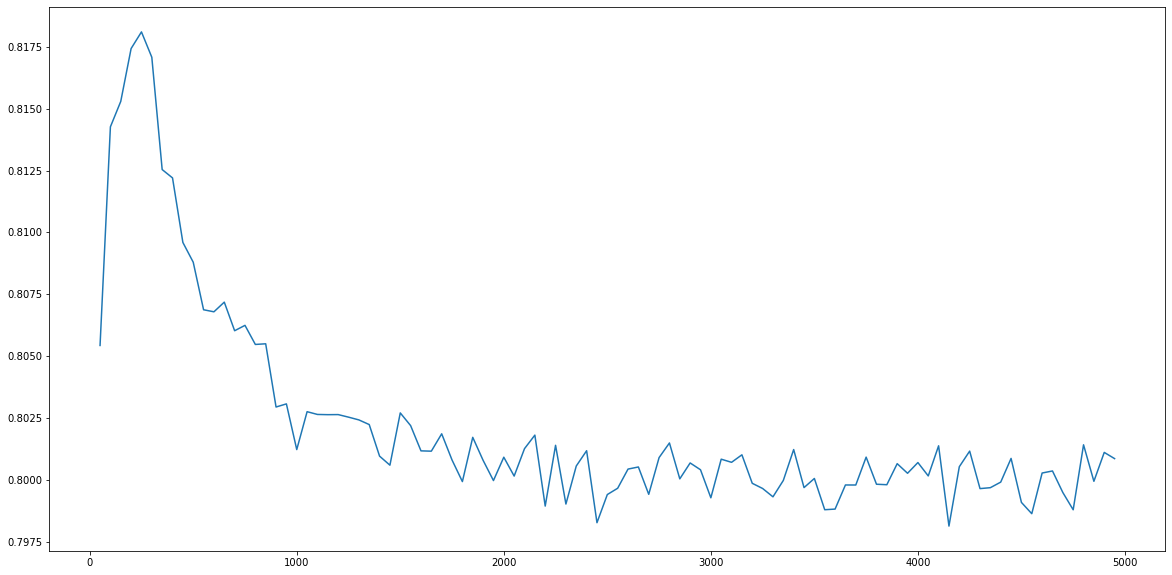

In [126]:
plt.plot(list(range(50,5000,50)),rscore)

In [129]:
rscore

[0.8054322304087687,
 0.814264832422849,
 0.8152918594200419,
 0.8174272381117713,
 0.8180996380876276,
 0.8170750788544718,
 0.8125384250803898,
 0.8122011204913953,
 0.8095941592419083,
 0.8087958305205977,
 0.806874674244996,
 0.8067919412198149,
 0.8071823626314077,
 0.8060273218936198,
 0.8062444219103974,
 0.8054731260741407,
 0.8054998300435083,
 0.8029454926759036,
 0.8030717126591269,
 0.8012260153317923,
 0.8027566066621211,
 0.8026452367600677,
 0.8026360956601147,
 0.8026396076739579,
 0.8025360500147232,
 0.8024247796644266,
 0.802236798854612,
 0.8009607260657668,
 0.8005952043508155,
 0.8027069028358241,
 0.8021935211709201,
 0.8011742793132914,
 0.8011612525247693,
 0.8018631540418392,
 0.8008047470319553,
 0.7999330141405397,
 0.8017207770378343,
 0.8007922802061682,
 0.7999743934340396,
 0.8009172640547528,
 0.8001556277874767,
 0.8012632155900173,
 0.8018101116092664,
 0.7989433559390263,
 0.8013981284072975,
 0.7990253676881869,
 0.8005622366696237,
 0.8011795652902

# Stacking ensemble

In [127]:
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor

In [128]:
dt=DecisionTreeRegressor(max_depth=6,max_leaf_nodes= 17,min_samples_leaf= 13,min_samples_split= 10)

In [130]:
estimators = [
...     ('lr', LinearRegression()),
...     ('ada', AdaBoostRegressor(base_estimator=dt,n_estimators=100)),
        ('gb',GradientBoostingRegressor(n_estimators=100)),]
reg = StackingRegressor(estimators=estimators,final_estimator=RandomForestRegressor(n_estimators=10) )

In [131]:
reg.fit(X_train, y_train)

StackingRegressor(estimators=[('lr', LinearRegression()),
                              ('ada',
                               AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=6,
                                                                                      max_leaf_nodes=17,
                                                                                      min_samples_leaf=13,
                                                                                      min_samples_split=10),
                                                 n_estimators=100)),
                              ('gb', GradientBoostingRegressor())],
                  final_estimator=RandomForestRegressor(n_estimators=10))

In [132]:
reg.score(X_test,y_test)

0.789422327998699

The models that we have used here are

Linear Regression

DecisionTreeRegression

Ridge and Lasso Regression

AdaBoostRegression(using LinearRegression and DecisionTreeRegression)

GradientBoostRegression

StackingRegression(using linearRegression,AdaBoostRegression and GradientBoostRegression as base models and RandomForest as final model to aggregate the results)

LinearRegression gave a decent performance.The performance of DecisionTree was not as good as LinearRegression.
The performance of Ridge Regression was better than LinearRegression but the performnace if LassoRegression was horribly bad.
Performance of AdaBoost was also similar to to Ridge Regression
GradientBoost gave the best performance. The performance of the stacking ensemble was also decent